In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN',"NAME"], axis=1)
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning

# For those columns that have more than 10 unique values, determine the number of data points 
# for each unique value.
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

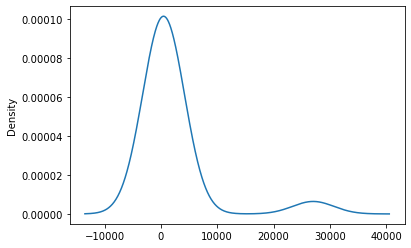

In [5]:
# Visualize the value counts of APPLICATION_TYPE
# Create a density plot to determine the distribution of the column values.

application_type_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 200].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

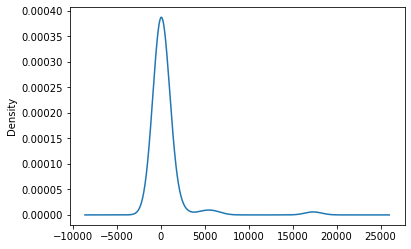

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1700].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.to_list()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [12]:
### Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat, 1)
application_df.head()

/Users/Fabiola/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df["STATUS"].values
X = application_df.drop(["STATUS"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


/Users/Fabiola/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 86
hidden_nodes_layer2 = 86

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 86)                3784      
                                                                 
 dense_1 (Dense)             (None, 86)                7482      
                                                                 
 dense_2 (Dense)             (None, 1)                 87        
                                                                 
Total params: 11,353
Trainable params: 11,353
Non-trainable params: 0
_________________________________________________________________


2022-08-14 21:39:52.736976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
len(X_train[0])

43

In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    #verbose = we'll be notified when a checkpoint is being saved to the directory
    verbose=1,
    save_weights_only=True,
    save_freq='epoch' == 5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])


Epoch 1/100

Epoch 1: saving model to checkpoints/weights.01.hdf5
  1/804 [..............................] - ETA: 4:28 - loss: 0.6016 - accuracy: 0.7812
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
  6/804 [..............................] - ETA: 9s - loss: 0.4892 - accuracy: 0.9271  
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 10/804 [..............................] - ETA: 9s - loss: 0.4024 - accuracy: 0.9563
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to chec

111/804 [===>..........................] - ETA: 8s - loss: 0.0575 - accuracy: 0.9961
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
116/804 [===>..........................] - ETA: 8s - loss: 0.0551 - accuracy: 0.9962
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
121/804 [===>..........................] - ETA: 8s - loss: 0.0528 - accuracy: 0.9964
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.


Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
231/804 [=======>......................] - ETA: 6s - loss: 0.0280 - accuracy: 0.9981
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
237/804 [=======>......................] - ETA: 6s - loss: 0.0273 - accuracy: 0.9982
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
243/804 [========>.....................] - ETA: 6s - loss: 0.0266 - accuracy


Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
350/804 [============>.................] - ETA: 4s - loss: 0.0185 - accuracy: 0.9987
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
355/804 [============>.................] - ETA: 4s - loss: 0.0183 - accuracy: 0.9988
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.0180 - accuracy: 0.9988
Epoch 1: saving model to checkpoints/weights.


Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.0155 - accuracy: 0.9989
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
473/804 [================>.............] - ETA: 3s - loss: 0.0153 - accuracy: 0.9989
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
477/804 [================>.............] - ETA: 3s - loss: 0.0152 - accuracy: 0.9990
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.

585/804 [====================>.........] - ETA: 2s - loss: 0.0163 - accuracy: 0.9990
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 0.0161 - accuracy: 0.9990
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
597/804 [=====================>........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9991
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.

705/804 [=========================>....] - ETA: 1s - loss: 0.0139 - accuracy: 0.9992
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.0138 - accuracy: 0.9992
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.0137 - accuracy: 0.9992
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.

 19/804 [..............................] - ETA: 7s - loss: 1.9177e-04 - accuracy: 1.0000
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 25/804 [..............................] - ETA: 7s - loss: 1.9531e-04 - accuracy: 1.0000
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 31/804 [>.............................] - ETA: 7s - loss: 1.8455e-04 - accuracy: 1.0000
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoi

138/804 [====>.........................] - ETA: 6s - loss: 1.4034e-04 - accuracy: 1.0000
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
143/804 [====>.........................] - ETA: 6s - loss: 1.3829e-04 - accuracy: 1.0000
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
149/804 [====>.........................] - ETA: 6s - loss: 1.3747e-04 - accuracy: 1.0000
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoi

257/804 [========>.....................] - ETA: 5s - loss: 0.0031 - accuracy: 0.9998
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
263/804 [========>.....................] - ETA: 5s - loss: 0.0039 - accuracy: 0.9996
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
269/804 [=========>....................] - ETA: 5s - loss: 0.0038 - accuracy: 0.9997
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.


Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
382/804 [=============>................] - ETA: 4s - loss: 0.0028 - accuracy: 0.9998
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
388/804 [=============>................] - ETA: 4s - loss: 0.0027 - accuracy: 0.9998
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model


Epoch 2: saving model to checkpoints/weights.02.hdf5
499/804 [=================>............] - ETA: 2s - loss: 0.0022 - accuracy: 0.9998
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.0021 - accuracy: 0.9998
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.0021 - accuracy: 0.9998
Epoch 2: saving model to checkpoints/weights.

615/804 [=====================>........] - ETA: 1s - loss: 0.0025 - accuracy: 0.9997
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.0025 - accuracy: 0.9997
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.0025 - accuracy: 0.9998
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.


Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.0021 - accuracy: 0.9998
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.0021 - accuracy: 0.9998
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.0021 - accuracy

 48/804 [>.............................] - ETA: 7s - loss: 0.0081 - accuracy: 0.9987
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 54/804 [=>............................] - ETA: 7s - loss: 0.0072 - accuracy: 0.9988
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 60/804 [=>............................] - ETA: 7s - loss: 0.0065 - accuracy: 0.9990
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.


Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
172/804 [=====>........................] - ETA: 6s - loss: 0.0034 - accuracy: 0.9995
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
178/804 [=====>........................] - ETA: 6s - loss: 0.0033 - accuracy: 0.9995
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model

289/804 [=========>....................] - ETA: 5s - loss: 0.0028 - accuracy: 0.9996
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
294/804 [=========>....................] - ETA: 5s - loss: 0.0028 - accuracy: 0.9996
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
300/804 [==========>...................] - ETA: 4s - loss: 0.0027 - accuracy: 0.9996
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.


Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
412/804 [==============>...............] - ETA: 3s - loss: 0.0020 - accuracy: 0.9997
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
418/804 [==============>...............] - ETA: 3s - loss: 0.0020 - accuracy: 0.9997
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
424/804 [=============

529/804 [==================>...........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9998
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9998
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9998
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.

644/804 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.

759/804 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.0018 - accuracy: 0.9998
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.

 69/804 [=>............................] - ETA: 7s - loss: 2.5618e-05 - accuracy: 1.0000
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 73/804 [=>............................] - ETA: 7s - loss: 2.5727e-05 - accuracy: 1.0000
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 78/804 [=>............................] - ETA: 7s - loss: 2.5922e-05 - accuracy: 1.0000
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoi


Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
189/804 [======>.......................] - ETA: 6s - loss: 0.0025 - accuracy: 0.9997
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
195/804 [======>.......................] - ETA: 6s - loss: 0.0024 - accuracy: 0.9997
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
200/804 [======>......


Epoch 4: saving model to checkpoints/weights.04.hdf5
304/804 [==========>...................] - ETA: 5s - loss: 0.0029 - accuracy: 0.9997
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.0028 - accuracy: 0.9997
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
315/804 [==========>...................] - ETA: 4s - loss: 0.0033 - accuracy: 0.9996
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.

421/804 [==============>...............] - ETA: 3s - loss: 0.0031 - accuracy: 0.9996
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.0031 - accuracy: 0.9996
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.0031 - accuracy: 0.9996
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.

541/804 [===================>..........] - ETA: 2s - loss: 0.0025 - accuracy: 0.9997
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.0025 - accuracy: 0.9997
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.0024 - accuracy: 0.9997
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.


Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.0020 - accuracy: 0.9998
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
668/804 [=======================>......] - ETA: 1s - loss: 0.0020 - accuracy: 0.9998
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.0020 - accuracy: 0.9998
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.


Epoch 4: saving model to checkpoints/weights.04.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9998
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9998
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9998
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.


Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
 96/804 [==>...........................] - ETA: 7s - loss: 3.9158e-05 - accuracy: 1.0000
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
101/804 [==>...........................] - ETA: 7s - loss: 3.8513e-05 - accuracy: 1.0000
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
106/804 [==>...........................] - ETA: 7s - loss: 3.7567e-0


Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
213/804 [======>.......................] - ETA: 6s - loss: 3.1027e-05 - accuracy: 1.0000
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
219/804 [=======>......................] - ETA: 5s - loss: 3.0529e-05 - accuracy: 1.0000
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
225/804 [=====

330/804 [===========>..................] - ETA: 4s - loss: 2.7217e-05 - accuracy: 1.0000
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
336/804 [===========>..................] - ETA: 4s - loss: 2.6920e-05 - accuracy: 1.0000
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
342/804 [===========>..................] - ETA: 4s - loss: 2.6735e-05 - accuracy: 1.0000
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoi


Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
451/804 [===============>..............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9998
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
457/804 [================>.............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9998
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
463/804 [================>.............] - ETA: 3s - loss: 0.0013 - accuracy


Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
571/804 [====================>.........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
577/804 [====================>.........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
583/804 [====================>.........] - ETA: 2s - loss: 0.0016 - accuracy


Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
694/804 [========================>.....] - ETA: 1s - loss: 0.0017 - accuracy: 0.9997
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.0017 - accuracy: 0.9997
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model

Epoch 6/100

Epoch 6: saving model to checkpoints/weights.06.hdf5
  1/804 [..............................] - ETA: 8s - loss: 2.3806e-05 - accuracy: 1.0000
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
  6/804 [..............................] - ETA: 8s - loss: 1.4720e-04 - accuracy: 1.0000
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
 11/804 [..............................] - ETA: 8s - loss: 1.1245e-04 - accuracy: 1.0000
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model


Epoch 6: saving model to checkpoints/weights.06.hdf5
117/804 [===>..........................] - ETA: 7s - loss: 0.0019 - accuracy: 0.9997
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
122/804 [===>..........................] - ETA: 6s - loss: 0.0018 - accuracy: 0.9997
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
128/804 [===>..........................] - ETA: 6s - loss: 0.0017 - accuracy: 0.9998
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.


Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
236/804 [=======>......................] - ETA: 5s - loss: 9.5768e-04 - accuracy: 0.9999
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
241/804 [=======>......................] - ETA: 5s - loss: 9.3903e-04 - accuracy: 0.9999
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
246/804 [========>.....................] - ETA: 5s - loss: 9.2039e-04 - accuracy: 0.9999
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoi

349/804 [============>.................] - ETA: 4s - loss: 6.6916e-04 - accuracy: 0.9999
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
354/804 [============>.................] - ETA: 4s - loss: 6.6021e-04 - accuracy: 0.9999
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
360/804 [============>.................] - ETA: 4s - loss: 6.4961e-04 - accuracy: 0.9999
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoi


Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
470/804 [================>.............] - ETA: 3s - loss: 5.0341e-04 - accuracy: 0.9999
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
475/804 [================>.............] - ETA: 3s - loss: 0.0010 - accuracy: 0.9999    
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: savi

583/804 [====================>.........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.

702/804 [=========================>....] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.


Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
 18/804 [..............................] - ETA: 7s - loss: 6.5403e-04 - accuracy: 1.0000
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
 24/804 [..............................] - ETA: 7s - loss: 7.1984e-04 - accuracy: 1.0000
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
 29/804 [>....


Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
135/804 [====>.........................] - ETA: 6s - loss: 2.0748e-04 - accuracy: 1.0000
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
140/804 [====>.........................] - ETA: 6s - loss: 2.0174e-04 - accuracy: 1.0000
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
145/804 [====>.........................] - ETA: 6s - loss: 1.9552e-04 - accuracy: 1.0000
Epoch 7: saving model to checkpoi

249/804 [========>.....................] - ETA: 5s - loss: 6.8959e-04 - accuracy: 0.9999
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
255/804 [========>.....................] - ETA: 5s - loss: 6.7377e-04 - accuracy: 0.9999
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
261/804 [========>.....................] - ETA: 5s - loss: 6.6068e-04 - accuracy: 0.9999
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoi

366/804 [============>.................] - ETA: 4s - loss: 5.1480e-04 - accuracy: 0.9999
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
371/804 [============>.................] - ETA: 4s - loss: 5.1126e-04 - accuracy: 0.9999
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
376/804 [=============>................] - ETA: 4s - loss: 5.0466e-04 - accuracy: 0.9999
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoi


Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
486/804 [=================>............] - ETA: 3s - loss: 4.0327e-04 - accuracy: 0.9999
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
492/804 [=================>............] - ETA: 3s - loss: 3.9851e-04 - accuracy: 0.9999
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: savi

599/804 [=====================>........] - ETA: 2s - loss: 7.3779e-04 - accuracy: 0.9999
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
605/804 [=====================>........] - ETA: 2s - loss: 7.3270e-04 - accuracy: 0.9999
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 7.2774e-04 - accuracy: 0.9999
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoi


Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 7: saving model to checkpoints/weights.


Epoch 8: saving model to checkpoints/weights.08.hdf5
 26/804 [..............................] - ETA: 7s - loss: 1.1711e-04 - accuracy: 1.0000
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
 31/804 [>.............................] - ETA: 7s - loss: 1.1089e-04 - accuracy: 1.0000
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
 36/804 [>.............................] - ETA: 7s - loss: 9.8651e-05 - accuracy: 1.0000
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoi


Epoch 8: saving model to checkpoints/weights.08.hdf5
141/804 [====>.........................] - ETA: 6s - loss: 8.3510e-05 - accuracy: 1.0000
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
146/804 [====>.........................] - ETA: 6s - loss: 8.5010e-05 - accuracy: 1.0000
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
151/804 [====>.........................] - ETA: 6s - loss: 8.2431e-05 - accuracy: 1.0000
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoi


Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
260/804 [========>.....................] - ETA: 5s - loss: 6.8869e-05 - accuracy: 1.0000
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
265/804 [========>.....................] - ETA: 5s - loss: 6.8417e-05 - accuracy: 1.0000
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
271/804 [=====


Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
377/804 [=============>................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
383/804 [=============>................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9998
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
389/804 [=============>................] - ETA: 4s - loss: 0.0015 - accuracy

494/804 [=================>............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
499/804 [=================>............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
504/804 [=================>............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9998
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.


Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.0015 - accuracy: 0.9997
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.0015 - accuracy: 0.9997
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.0015 - accuracy

729/804 [==========================>...] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.

 41/804 [>.............................] - ETA: 7s - loss: 4.9009e-05 - accuracy: 1.0000
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 46/804 [>.............................] - ETA: 7s - loss: 4.6957e-05 - accuracy: 1.0000
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
 51/804 [>.............................] - ETA: 7s - loss: 4.3598e-05 - accuracy: 1.0000
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoi

157/804 [====>.........................] - ETA: 6s - loss: 3.6102e-05 - accuracy: 1.0000
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
163/804 [=====>........................] - ETA: 6s - loss: 3.6276e-05 - accuracy: 1.0000
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
169/804 [=====>........................] - ETA: 6s - loss: 3.5651e-05 - accuracy: 1.0000
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoi


Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
277/804 [=========>....................] - ETA: 5s - loss: 2.9959e-05 - accuracy: 1.0000
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
282/804 [=========>....................] - ETA: 5s - loss: 8.1482e-04 - accuracy: 0.9999
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
288/804 [=====


Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
394/804 [=============>................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
399/804 [=============>................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
404/804 [==============>...............] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 9: saving model to checkpoints/weights.


Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
517/804 [==================>...........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
522/804 [==================>...........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 9: saving model to checkpoints/weights.

628/804 [======================>.......] - ETA: 1s - loss: 9.9410e-04 - accuracy: 0.9999
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 9.8657e-04 - accuracy: 0.9999
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
639/804 [======================>.......] - ETA: 1s - loss: 9.7780e-04 - accuracy: 0.9999
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoi


Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 9: saving model to checkpoints/weights.

 55/804 [=>............................] - ETA: 7s - loss: 9.9485e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
 60/804 [=>............................] - ETA: 7s - loss: 9.6239e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
 65/804 [=>............................] - ETA: 7s - loss: 9.2388e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving mod

169/804 [=====>........................] - ETA: 6s - loss: 4.9169e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
174/804 [=====>........................] - ETA: 6s - loss: 4.7917e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
179/804 [=====>........................] - ETA: 6s - loss: 4.7024e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving mod


Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
285/804 [=========>....................] - ETA: 5s - loss: 5.2885e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
290/804 [=========>....................] - ETA: 5s - loss: 5.2053e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 5.1242e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving mod

398/804 [=============>................] - ETA: 4s - loss: 3.9198e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
404/804 [==============>...............] - ETA: 4s - loss: 3.8631e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 3.8170e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving mod


Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 3.1438e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
520/804 [==================>...........] - ETA: 2s - loss: 3.1182e-05 - accuracy: 1.0000
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
526/804 [==================>...........] - ETA: 2s - l

628/804 [======================>.......] - ETA: 1s - loss: 6.8771e-04 - accuracy: 0.9999
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 6.8237e-04 - accuracy: 0.9999
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 6.7910e-04 - accuracy: 0.9999
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving mod


Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 10: saving model to checkp

 53/804 [>.............................] - ETA: 7s - loss: 1.6223e-04 - accuracy: 1.0000
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
 58/804 [=>............................] - ETA: 7s - loss: 1.5475e-04 - accuracy: 1.0000
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
 63/804 [=>............................] - ETA: 7s - loss: 1.4539e-04 - accuracy: 1.0000
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving mod


Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.0020 - accuracy: 0.9996
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
176/804 [=====>........................] - ETA: 6s - loss: 0.0019 - accuracy: 0.9996
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
182/804 [=====>........................] - ETA: 6s - loss: 0.0


Epoch 11: saving model to checkpoints/weights.11.hdf5
285/804 [=========>....................] - ETA: 5s - loss: 0.0025 - accuracy: 0.9995
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
290/804 [=========>....................] - ETA: 5s - loss: 0.0025 - accuracy: 0.9995
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 0.0024 - accuracy: 0.9995
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkp


Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
401/804 [=============>................] - ETA: 4s - loss: 0.0019 - accuracy: 0.9996
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
406/804 [==============>...............] - ETA: 4s - loss: 0.0018 - accuracy: 0.9996
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
411/804 [==============>...............] - ETA: 4s - loss: 0.0018 - accuracy: 0.9996
Epoch 11: saving model to checkp


Epoch 11: saving model to checkpoints/weights.11.hdf5
513/804 [==================>...........] - ETA: 3s - loss: 0.0015 - accuracy: 0.9997
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkp


Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkp


Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.0


Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
 51/804 [>.............................] - ETA: 7s - loss: 1.1012e-05 - accuracy: 1.0000
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
 56/804 [=>............................] - ETA: 7s - loss: 1.0406e-05 - accuracy: 1.0000
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
 61/804 [=>............................] - ETA: 7s - loss: 9.6600e-06 - accuracy: 1.0000
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving mod

164/804 [=====>........................] - ETA: 6s - loss: 0.0019 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
170/804 [=====>........................] - ETA: 6s - loss: 0.0019 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
175/804 [=====>........................] - ETA: 6s - loss: 0.0030 - accuracy: 0.9996
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkp


Epoch 12: saving model to checkpoints/weights.12.hdf5
281/804 [=========>....................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
291/804 [=========>....................] - ETA: 5s - loss: 0.0019 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkp


Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
397/804 [=============>................] - ETA: 4s - loss: 0.0023 - accuracy: 0.9997
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
402/804 [==============>...............] - ETA: 4s - loss: 0.0022 - accuracy: 0.9997
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 0.0022 - accuracy: 0.9997
Epoch 12: saving model to checkp


Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
512/804 [==================>...........] - ETA: 3s - loss: 0.0018 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 0.0018 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.0018 - accuracy: 0.9998
Epoch 12: saving model to checkp

625/804 [======================>.......] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkp

741/804 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkp


Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 51/804 [>.............................] - ETA: 7s - loss: 0.0041 - accuracy: 0.9994
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 56/804 [=>............................] - ETA: 7s - loss: 0.0038 - accuracy: 0.9994
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
 61/804 [=>............................] - ETA: 7s - loss: 0.0035 - accuracy: 0.9995
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkp


Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.0013 - accuracy: 0.9998
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.0013 - accuracy: 0.9998
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
173/804 [=====>........................] - ETA: 6s - loss: 0.0013 - accuracy: 0.9998
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
175/804 [=====>........................] - ETA: 6s - loss: 0.0013 - accuracy: 0.9998
Epo

277/804 [=========>....................] - ETA: 5s - loss: 8.1670e-04 - accuracy: 0.9999
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
282/804 [=========>....................] - ETA: 5s - loss: 8.0228e-04 - accuracy: 0.9999
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
287/804 [=========>....................] - ETA: 5s - loss: 7.8924e-04 - accuracy: 0.9999
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving mod


Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
392/804 [=============>................] - ETA: 4s - loss: 5.8221e-04 - accuracy: 0.9999
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
397/804 [=============>................] - ETA: 4s - loss: 5.7493e-04 - accuracy: 0.9999
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
402/804 [==============>...............] - ETA: 4s - loss: 5.6784e-04 - accuracy: 0.9999
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving mod

504/804 [=================>............] - ETA: 3s - loss: 4.5445e-04 - accuracy: 0.9999
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
510/804 [==================>...........] - ETA: 3s - loss: 4.4915e-04 - accuracy: 0.9999
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
515/804 [==================>...........] - ETA: 3s - loss: 4.4492e-04 - accuracy: 0.9999
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving mod


Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9999
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9999
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkp


Epoch 13: saving model to checkpoints/weights.13.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkp


Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 48/804 [>.............................] - ETA: 7s - loss: 1.6498e-04 - accuracy: 1.0000
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 53/804 [>.............................] - ETA: 7s - loss: 1.5816e-04 - accuracy: 1.0000
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5


Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
160/804 [====>.........................] - ETA: 6s - loss: 0.0016 - accuracy: 0.9996
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
165/804 [=====>........................] - ETA: 6s - loss: 0.0016 - accuracy: 0.9996
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
170/804 [=====>........................] - ETA: 6s - loss: 0.0015 - accuracy: 0.9996
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkp


Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
276/804 [=========>....................] - ETA: 5s - loss: 9.6052e-04 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
281/804 [=========>....................] - ETA: 5s - loss: 9.4431e-04 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
286/804 [=========>....................] - ETA: 5s - l


Epoch 14: saving model to checkpoints/weights.14.hdf5
388/804 [=============>................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
393/804 [=============>................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
398/804 [=============>................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkp


Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
504/804 [=================>............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
509/804 [=================>............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
514/804 [==================>...........] - ETA: 3s - loss: 0.0014 - accuracy: 0.9998
Epoch 14: saving model to checkp

617/804 [======================>.......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkp


Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 9.9887e-04 - accuracy: 0.9998
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
745/804 [==========================>...] - ETA: 0s - loss:


Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 43/804 [>.............................] - ETA: 7s - loss: 1.8124e-04 - accuracy: 1.0000
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 48/804 [>.............................] - ETA: 7s - loss: 1.6399e-04 - accuracy: 1.0000
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 53/804 [>.............................] - ETA: 7s - loss: 1.7957e-04 - accuracy: 1.0000
Epoch 15: saving mod

154/804 [====>.........................] - ETA: 6s - loss: 1.1696e-04 - accuracy: 1.0000
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
159/804 [====>.........................] - ETA: 6s - loss: 1.1378e-04 - accuracy: 1.0000
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
164/804 [=====>........................] - ETA: 6s - loss: 1.1500e-04 - accuracy: 1.0000
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving mod


Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
269/804 [=========>....................] - ETA: 5s - loss: 6.5003e-04 - accuracy: 0.9999
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
274/804 [=========>....................] - ETA: 5s - loss: 6.3819e-04 - accuracy: 0.9999
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
279/804 [=========>....................] - ETA: 5s - loss: 6.2745e-04 - accuracy: 0.9999
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving mod


Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
382/804 [=============>................] - ETA: 4s - loss: 5.0637e-04 - accuracy: 0.9999
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
387/804 [=============>................] - ETA: 4s - loss: 5.0006e-04 - accuracy: 0.9999
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
392/804 [=============>................] - ETA: 4s - loss: 4.9395e-04 - accuracy: 0.9999
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving mod

494/804 [=================>............] - ETA: 3s - loss: 8.0513e-04 - accuracy: 0.9999
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
499/804 [=================>............] - ETA: 3s - loss: 7.9956e-04 - accuracy: 0.9999
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
504/804 [=================>............] - ETA: 3s - loss: 7.9385e-04 - accuracy: 0.9999
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving mod

607/804 [=====================>........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
612/804 [=====================>........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkp


Epoch 15: saving model to checkpoints/weights.15.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkp


Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
 31/804 [>.............................] - ETA: 8s - loss: 8.4159e-05 - accuracy: 1.0000
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
 36/804 [>.............................] - ETA: 8s - loss: 8.2823e-05 - accuracy: 1.0000
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
 41/804 [>.............................] - ETA: 8s - loss: 7.3556e-05 - accuracy: 1.0000
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving mod

142/804 [====>.........................] - ETA: 6s - loss: 9.7074e-04 - accuracy: 0.9998
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
147/804 [====>.........................] - ETA: 6s - loss: 9.3847e-04 - accuracy: 0.9998
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
152/804 [====>.........................] - ETA: 6s - loss: 9.0957e-04 - accuracy: 0.9998
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving mod


Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
257/804 [========>.....................] - ETA: 5s - loss: 0.0022 - accuracy: 0.9996
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
262/804 [========>.....................] - ETA: 5s - loss: 0.0021 - accuracy: 0.9996
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
267/804 [========>.....................] - ETA: 5s - loss: 0.0021 - accuracy: 0.9996
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkp

370/804 [============>.................] - ETA: 4s - loss: 0.0022 - accuracy: 0.9997
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
375/804 [============>.................] - ETA: 4s - loss: 0.0022 - accuracy: 0.9997
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
380/804 [=============>................] - ETA: 4s - loss: 0.0022 - accuracy: 0.9997
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkp


Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
487/804 [=================>............] - ETA: 3s - loss: 0.0017 - accuracy: 0.9997
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
492/804 [=================>............] - ETA: 3s - loss: 0.0017 - accuracy: 0.9997
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
497/804 [=================>............] - ETA: 3s - loss: 0.0017 - accuracy: 0.9997
Epoch 16: saving model to checkp


Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 16: saving model to checkp

712/804 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkp


Epoch 17: saving model to checkpoints/weights.17.hdf5
 21/804 [..............................] - ETA: 8s - loss: 2.1487e-05 - accuracy: 1.0000
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
 26/804 [..............................] - ETA: 8s - loss: 2.7135e-05 - accuracy: 1.0000
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
 31/804 [>.............................] - ETA: 7s - loss: 2.5034e-05 - accuracy: 1.0000
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving mod


Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
137/804 [====>.........................] - ETA: 6s - loss: 3.1522e-05 - accuracy: 1.0000
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
142/804 [====>.........................] - ETA: 6s - loss: 3.0691e-05 - accuracy: 1.0000
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
147/804 [====>.........................] - ETA: 6s - l

248/804 [========>.....................] - ETA: 5s - loss: 0.0015 - accuracy: 0.9997
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
253/804 [========>.....................] - ETA: 5s - loss: 0.0015 - accuracy: 0.9998
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
258/804 [========>.....................] - ETA: 5s - loss: 0.0015 - accuracy: 0.9998
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkp


Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.0018 - accuracy: 0.9997
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.0017 - accuracy: 0.9997
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.0


Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
480/804 [================>.............] - ETA: 3s - loss: 0.0018 - accuracy: 0.9997
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
485/804 [=================>............] - ETA: 3s - loss: 0.0018 - accuracy: 0.9997
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
490/804 [=================>............] - ETA: 3s - loss: 0.0018 - accuracy: 0.9997
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkp


Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.0

707/804 [=========================>....] - ETA: 1s - loss: 0.0016 - accuracy: 0.9998
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkp


Epoch 18: saving model to checkpoints/weights.18.hdf5
 16/804 [..............................] - ETA: 8s - loss: 1.0263e-04 - accuracy: 1.0000
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 21/804 [..............................] - ETA: 8s - loss: 7.8669e-05 - accuracy: 1.0000
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
 26/804 [..............................] - ETA: 7s - loss: 6.4997e-05 - accuracy: 1.0000
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving mod


Epoch 18: saving model to checkpoints/weights.18.hdf5
130/804 [===>..........................] - ETA: 7s - loss: 0.0017 - accuracy: 0.9995
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
135/804 [====>.........................] - ETA: 7s - loss: 0.0031 - accuracy: 0.9993
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
140/804 [====>.........................] - ETA: 6s - loss: 0.0030 - accuracy: 0.9993
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkp


Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
245/804 [========>.....................] - ETA: 5s - loss: 0.0018 - accuracy: 0.9996
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
250/804 [========>.....................] - ETA: 5s - loss: 0.0018 - accuracy: 0.9996
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
255/804 [========>.....................] - ETA: 5s - loss: 0.0018 - accuracy: 0.9996
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkp


Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
360/804 [============>.................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9997
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
365/804 [============>.................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9997
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
370/804 [============>.................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9997
Epoch 18: saving model to checkp


Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
474/804 [================>.............] - ETA: 3s - loss: 0.0016 - accuracy: 0.9997
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
479/804 [================>.............] - ETA: 3s - loss: 0.0016 - accuracy: 0.9997
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
484/804 [=================>............] - ETA: 3s - loss: 0.0015 - accuracy: 0.9997
Epoch 18: saving model to checkp

585/804 [====================>.........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkp


Epoch 18: saving model to checkpoints/weights.18.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
705/804 [=========================>....] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkp


Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 11/804 [..............................] - ETA: 8s - loss: 1.8527e-04 - accuracy: 1.0000
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 16/804 [..............................] - ETA: 8s - loss: 1.6175e-04 - accuracy: 1.0000
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
 21/804 [..............................] - ETA: 8s - l

121/804 [===>..........................] - ETA: 7s - loss: 8.4504e-05 - accuracy: 1.0000
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
126/804 [===>..........................] - ETA: 7s - loss: 8.2549e-05 - accuracy: 1.0000
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
131/804 [===>..........................] - ETA: 7s - loss: 8.1664e-05 - accuracy: 1.0000
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving mod


Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
236/804 [=======>......................] - ETA: 5s - loss: 6.6445e-05 - accuracy: 1.0000
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
241/804 [=======>......................] - ETA: 5s - loss: 6.6045e-05 - accuracy: 1.0000
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
246/804 [========>.....................] - ETA: 5s - loss: 6.5445e-05 - accuracy: 1.0000
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving mod


Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
351/804 [============>.................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
356/804 [============>.................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
361/804 [============>.................] - ETA: 4s - loss: 9.9

461/804 [================>.............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
465/804 [================>.............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
470/804 [================>.............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkp

575/804 [====================>.........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
585/804 [====================>.........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkp


Epoch 19: saving model to checkpoints/weights.19.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
700/804 [=========================>....] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkp


Epoch 19: saving model to checkpoints/weights.19.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 20/100

Epoch 20: saving model to checkpoints/weights.20.hdf5
  1/804 [..............................] - ETA: 8s - loss: 2.6976e-06 - accuracy: 1.0000
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
  6/804 [..............................] - ETA: 8s - loss: 1.1877e-05 - accuracy: 1.0000
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
 11/804 [..............................] - ETA: 8s - loss: 6.

111/804 [===>..........................] - ETA: 7s - loss: 4.5418e-05 - accuracy: 1.0000
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
116/804 [===>..........................] - ETA: 7s - loss: 4.3807e-05 - accuracy: 1.0000
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
121/804 [===>..........................] - ETA: 7s - loss: 4.4570e-05 - accuracy: 1.0000
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving mod


Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
227/804 [=======>......................] - ETA: 5s - loss: 0.0023 - accuracy: 0.9996
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
232/804 [=======>......................] - ETA: 5s - loss: 0.0023 - accuracy: 0.9996
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
237/804 [=======>......................] - ETA: 5s - loss: 0.0022 - accuracy: 0.9996
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkp


Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
343/804 [===========>..................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9997
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
346/804 [===========>..................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9997
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
348/804 [===========>..................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9997
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
351/804 [============>.................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9997
Epo


Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.0018 - accuracy: 0.9997
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.0018 - accuracy: 0.9997
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.0

566/804 [====================>.........] - ETA: 2s - loss: 0.0018 - accuracy: 0.9997
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
571/804 [====================>.........] - ETA: 2s - loss: 0.0018 - accuracy: 0.9997
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
576/804 [====================>.........] - ETA: 2s - loss: 0.0018 - accuracy: 0.9997
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkp


Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkp


Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
804/804 [==============================] - 9s 11ms/step - loss: 0.0016 - accuracy: 0.9998
Epoch 21/100

Epoch 21: saving model to checkpoints/weights.21.hdf5
  1/804 [..............................] - ETA: 9s - loss: 1.9727e-04 - accuracy: 1.0000
Epoch 21: saving model to checkpoin

101/804 [==>...........................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9997
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
106/804 [==>...........................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9997
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
111/804 [===>..........................] - ETA: 7s - loss: 0.0019 - accuracy: 0.9997
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkp


Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
218/804 [=======>......................] - ETA: 6s - loss: 0.0015 - accuracy: 0.9997
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
223/804 [=======>......................] - ETA: 6s - loss: 0.0014 - accuracy: 0.9997
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
228/804 [=======>......................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9997
Epoch 21: saving model to checkp


Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
333/804 [===========>..................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
343/804 [===========>..................] - ETA: 4s - loss: 0.0

443/804 [===============>..............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
448/804 [===============>..............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkp


Epoch 21: saving model to checkpoints/weights.21.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkp


Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
683/804 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkp


Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 21: saving model to checkp


Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
 96/804 [==>...........................] - ETA: 7s - loss: 1.2906e-04 - accuracy: 1.0000
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
101/804 [==>...........................] - ETA: 7s - loss: 1.2361e-04 - accuracy: 1.0000
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
106/804 [==>...........................] - ETA: 7s - l

206/804 [======>.......................] - ETA: 6s - loss: 7.6405e-04 - accuracy: 0.9998
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
211/804 [======>.......................] - ETA: 6s - loss: 7.4666e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
216/804 [=======>......................] - ETA: 6s - loss: 7.3268e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving mod


Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
321/804 [==========>...................] - ETA: 5s - loss: 5.5260e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
326/804 [===========>..................] - ETA: 5s - loss: 5.4470e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
331/804 [===========>..................] - ETA: 5s - loss: 5.3650e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving mod


Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 4.2070e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 4.1655e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
446/804 [===============>..............] - ETA: 3s - l

546/804 [===================>..........] - ETA: 2s - loss: 3.4141e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 3.3841e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 3.3546e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving mod


Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 6.3948e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 6.3481e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 6.3022e-04 - accuracy: 0.9999
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving mod


Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 22: saving model to checkp

 81/804 [==>...........................] - ETA: 7s - loss: 2.4578e-04 - accuracy: 1.0000
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 2.3718e-04 - accuracy: 1.0000
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
 91/804 [==>...........................] - ETA: 7s - loss: 0.0018 - accuracy: 0.9997    
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving mod


Epoch 23: saving model to checkpoints/weights.23.hdf5
196/804 [======>.......................] - ETA: 6s - loss: 0.0016 - accuracy: 0.9997
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
201/804 [======>.......................] - ETA: 6s - loss: 0.0016 - accuracy: 0.9997
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
206/804 [======>.......................] - ETA: 6s - loss: 0.0015 - accuracy: 0.9997
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkp


Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
311/804 [==========>...................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9995
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
316/804 [==========>...................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9995
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
321/804 [==========>...................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9995
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkp


Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
426/804 [==============>...............] - ETA: 3s - loss: 0.0020 - accuracy: 0.9996
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
431/804 [===============>..............] - ETA: 3s - loss: 0.0020 - accuracy: 0.9996
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.0020 - accuracy: 0.9996
Epoch 23: saving model to checkp


Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
551/804 [===================>..........] - ETA: 2s - loss: 0.0

651/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkp


Epoch 23: saving model to checkpoints/weights.23.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkp


Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9996
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
 81/804 [==>...........................] - ETA: 7s - loss: 0.0019 - accuracy: 0.9996
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
 86/804 [==>...........................] - ETA: 7s - loss: 0.0018 - accuracy: 0.9996
Epoch 24: saving model to checkp


Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
191/804 [======>.......................] - ETA: 6s - loss: 0.0027 - accuracy: 0.9995
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
196/804 [======>.......................] - ETA: 6s - loss: 0.0027 - accuracy: 0.9995
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
201/804 [======>.......................] - ETA: 6s - loss: 0.0

301/804 [==========>...................] - ETA: 5s - loss: 0.0026 - accuracy: 0.9996
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 0.0025 - accuracy: 0.9996
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
311/804 [==========>...................] - ETA: 5s - loss: 0.0025 - accuracy: 0.9996
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkp

415/804 [==============>...............] - ETA: 4s - loss: 0.0024 - accuracy: 0.9996
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
420/804 [==============>...............] - ETA: 4s - loss: 0.0024 - accuracy: 0.9996
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.0024 - accuracy: 0.9996
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkp

529/804 [==================>...........] - ETA: 2s - loss: 0.0019 - accuracy: 0.9997
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.0019 - accuracy: 0.9997
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.0019 - accuracy: 0.9997
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkp


Epoch 24: saving model to checkpoints/weights.24.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.0016 - accuracy: 0.9998
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.0016 - accuracy: 0.9998
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0016 - accuracy: 0.9998
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkp


Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkp

 66/804 [=>............................] - ETA: 7s - loss: 1.6704e-05 - accuracy: 1.0000
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
 71/804 [=>............................] - ETA: 7s - loss: 1.5552e-05 - accuracy: 1.0000
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 1.5318e-05 - accuracy: 1.0000
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving mod


Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
181/804 [=====>........................] - ETA: 6s - loss: 1.9037e-04 - accuracy: 0.9998
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
186/804 [=====>........................] - ETA: 6s - loss: 1.8593e-04 - accuracy: 0.9998
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
191/804 [======>.......................] - ETA: 6s - loss: 1.8118e-04 - accuracy: 0.9998
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving mod


Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
296/804 [==========>...................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9997
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
301/804 [==========>...................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9997
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
306/804 [==========>...................] - ETA: 5s - loss: 0.0

406/804 [==============>...............] - ETA: 4s - loss: 0.0012 - accuracy: 0.9997
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
411/804 [==============>...............] - ETA: 4s - loss: 0.0012 - accuracy: 0.9997
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
416/804 [==============>...............] - ETA: 4s - loss: 0.0012 - accuracy: 0.9997
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkp


Epoch 25: saving model to checkpoints/weights.25.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkp

633/804 [======================>.......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
643/804 [======================>.......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkp


Epoch 25: saving model to checkpoints/weights.25.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkp

 55/804 [=>............................] - ETA: 8s - loss: 0.0036 - accuracy: 0.9994    
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
 60/804 [=>............................] - ETA: 7s - loss: 0.0033 - accuracy: 0.9995
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
 65/804 [=>............................] - ETA: 7s - loss: 0.0030 - accuracy: 0.9995
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to ch


Epoch 26: saving model to checkpoints/weights.26.hdf5
170/804 [=====>........................] - ETA: 6s - loss: 0.0013 - accuracy: 0.9998
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
175/804 [=====>........................] - ETA: 6s - loss: 0.0013 - accuracy: 0.9998
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
180/804 [=====>........................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9998
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkp


Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
285/804 [=========>....................] - ETA: 5s - loss: 8.3493e-04 - accuracy: 0.9999
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
290/804 [=========>....................] - ETA: 5s - loss: 8.2321e-04 - accuracy: 0.9999
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
295/804 [==========>...................] - ETA: 5s - loss: 8.1011e-04 - accuracy: 0.9999
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving mod


Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
400/804 [=============>................] - ETA: 4s - loss: 6.0706e-04 - accuracy: 0.9999
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
405/804 [==============>...............] - ETA: 4s - loss: 8.9042e-04 - accuracy: 0.9998
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
410/804 [==============>...............] - ETA: 4s - l

510/804 [==================>...........] - ETA: 3s - loss: 7.3169e-04 - accuracy: 0.9999
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
515/804 [==================>...........] - ETA: 3s - loss: 7.2483e-04 - accuracy: 0.9999
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
520/804 [==================>...........] - ETA: 3s - loss: 7.1787e-04 - accuracy: 0.9999
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving mod


Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 9.3050e-04 - accuracy: 0.9998
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 9.2365e-04 - accuracy: 0.9998
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 9.1957e-04 - accuracy: 0.9998
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving mod


Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.0


Epoch 27: saving model to checkpoints/weights.27.hdf5
 46/804 [>.............................] - ETA: 7s - loss: 1.3105e-04 - accuracy: 1.0000
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
 51/804 [>.............................] - ETA: 7s - loss: 1.1835e-04 - accuracy: 1.0000
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
 56/804 [=>............................] - ETA: 7s - loss: 1.1089e-04 - accuracy: 1.0000
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving mod


Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
161/804 [=====>........................] - ETA: 6s - loss: 0.0018 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
166/804 [=====>........................] - ETA: 6s - loss: 0.0018 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
171/804 [=====>........................] - ETA: 6s - loss: 0.0017 - accuracy: 0.9998
Epoch 27: saving model to checkp


Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
276/804 [=========>....................] - ETA: 5s - loss: 0.0023 - accuracy: 0.9997
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
281/804 [=========>....................] - ETA: 5s - loss: 0.0023 - accuracy: 0.9997
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
286/804 [=========>....................] - ETA: 5s - loss: 0.0

386/804 [=============>................] - ETA: 4s - loss: 0.0017 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
391/804 [=============>................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
396/804 [=============>................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkp

498/804 [=================>............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
503/804 [=================>............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
508/804 [=================>............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkp


Epoch 27: saving model to checkpoints/weights.27.hdf5
613/804 [=====================>........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
618/804 [======================>.......] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkp


Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkp


Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 36/804 [>.............................] - ETA: 8s - loss: 1.3468e-05 - accuracy: 1.0000
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 41/804 [>.............................] - ETA: 8s - loss: 1.3649e-05 - accuracy: 1.0000
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 46/804 [>.............................] - ETA: 8s - loss: 1.4225e-05 - accuracy: 1.0000
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving mod


Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
151/804 [====>.........................] - ETA: 6s - loss: 2.1648e-04 - accuracy: 0.9998
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
156/804 [====>.........................] - ETA: 6s - loss: 2.0971e-04 - accuracy: 0.9998
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
161/804 [=====>........................] - ETA: 6s - l

261/804 [========>.....................] - ETA: 5s - loss: 6.7668e-04 - accuracy: 0.9998
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
266/804 [========>.....................] - ETA: 5s - loss: 6.6403e-04 - accuracy: 0.9998
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
271/804 [=========>....................] - ETA: 5s - loss: 6.5179e-04 - accuracy: 0.9998
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving mod


Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
376/804 [=============>................] - ETA: 4s - loss: 5.2033e-04 - accuracy: 0.9998
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
381/804 [=============>................] - ETA: 4s - loss: 5.1399e-04 - accuracy: 0.9998
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
386/804 [=============>................] - ETA: 4s - loss: 5.0742e-04 - accuracy: 0.9998
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving mod


Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
491/804 [=================>............] - ETA: 3s - loss: 4.1020e-04 - accuracy: 0.9999
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
496/804 [=================>............] - ETA: 3s - loss: 4.0608e-04 - accuracy: 0.9999
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
501/804 [=================>............] - ETA: 3s - l

601/804 [=====================>........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9997
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9997
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
611/804 [=====================>........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9997
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkp


Epoch 28: saving model to checkpoints/weights.28.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkp


Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 26/804 [..............................] - ETA: 8s - loss: 1.2778e-05 - accuracy: 1.0000
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 31/804 [>.............................] - ETA: 8s - loss: 1.4457e-05 - accuracy: 1.0000
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 36/804 [>.............................] - ETA: 8s - loss: 1.2498e-05 - accuracy: 1.0000
Epoch 29: saving mod


Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
141/804 [====>.........................] - ETA: 6s - loss: 0.0030 - accuracy: 0.9996
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
146/804 [====>.........................] - ETA: 6s - loss: 0.0030 - accuracy: 0.9996
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
151/804 [====>.........................] - ETA: 6s - loss: 0.0

251/804 [========>.....................] - ETA: 5s - loss: 0.0018 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.0017 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
261/804 [========>.....................] - ETA: 5s - loss: 0.0017 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkp


Epoch 29: saving model to checkpoints/weights.29.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkp


Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
481/804 [================>.............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
486/804 [=================>............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
491/804 [=================>............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkp


Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
601/804 [=====================>........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
606/804 [=====================>........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 29: saving model to checkp


Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.0

 16/804 [..............................] - ETA: 8s - loss: 3.0786e-04 - accuracy: 1.0000
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
 21/804 [..............................] - ETA: 8s - loss: 2.4253e-04 - accuracy: 1.0000
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
 26/804 [..............................] - ETA: 8s - loss: 1.9845e-04 - accuracy: 1.0000
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving mod


Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
131/804 [===>..........................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9998
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
136/804 [====>.........................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9998
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
141/804 [====>.........................] - ETA: 7s - loss: 0.0019 - accuracy: 0.9998
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkp


Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
246/804 [========>.....................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9999
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
251/804 [========>.....................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9999
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
256/804 [========>.....................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9999
Epoch 30: saving model to checkp


Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
361/804 [============>.................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9997
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9997
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.0

471/804 [================>.............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
476/804 [================>.............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
481/804 [================>.............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkp


Epoch 30: saving model to checkpoints/weights.30.hdf5
586/804 [====================>.........] - ETA: 2s - loss: 9.7761e-04 - accuracy: 0.9998
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
591/804 [=====================>........] - ETA: 2s - loss: 9.6934e-04 - accuracy: 0.9998
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
596/804 [=====================>........] - ETA: 2s - loss: 9.6157e-04 - accuracy: 0.9998
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving mod


Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
697/804 [=========================>....] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
702/804 [=========================>....] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
707/804 [=========================>....] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 30: saving model to checkp


Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
  6/804 [..............................] - ETA: 8s - loss: 4.2647e-05 - accuracy: 1.0000
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
 11/804 [..............................] - ETA: 8s - loss: 4.0853e-05 - accuracy: 1.0000
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
 16/804 [..............................] - ETA: 8s - l

105/804 [==>...........................] - ETA: 12s - loss: 0.0015 - accuracy: 0.9997
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
109/804 [===>..........................] - ETA: 12s - loss: 0.0015 - accuracy: 0.9997
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
114/804 [===>..........................] - ETA: 11s - loss: 0.0014 - accuracy: 0.9997
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
117/804 [===>..........................] - ETA: 11s - loss: 0.0014 - accuracy: 0.9997


Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
218/804 [=======>......................] - ETA: 8s - loss: 8.1595e-04 - accuracy: 0.9999
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
223/804 [=======>......................] - ETA: 8s - loss: 7.9767e-04 - accuracy: 0.9999
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
227/804 [=======>......................] - ETA: 8s - loss: 7.8415e-04 - accuracy: 0.9999
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving mod


Epoch 31: saving model to checkpoints/weights.31.hdf5
329/804 [===========>..................] - ETA: 6s - loss: 5.4612e-04 - accuracy: 0.9999
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
334/804 [===========>..................] - ETA: 6s - loss: 5.3796e-04 - accuracy: 0.9999
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
339/804 [===========>..................] - ETA: 6s - loss: 5.3005e-04 - accuracy: 0.9999
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving mod


Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
444/804 [===============>..............] - ETA: 4s - loss: 0.0018 - accuracy: 0.9997
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
449/804 [===============>..............] - ETA: 4s - loss: 0.0018 - accuracy: 0.9997
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
454/804 [===============>..............] - ETA: 4s - loss: 0.0018 - accuracy: 0.9997
Epoch 31: saving model to checkp


Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
559/804 [===================>..........] - ETA: 3s - loss: 0.0015 - accuracy: 0.9998
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.0

669/804 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkp


Epoch 31: saving model to checkpoints/weights.31.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
789/804 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkp

 90/804 [==>...........................] - ETA: 7s - loss: 1.0207e-04 - accuracy: 1.0000
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
 95/804 [==>...........................] - ETA: 7s - loss: 9.6711e-05 - accuracy: 1.0000
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
100/804 [==>...........................] - ETA: 7s - loss: 9.1924e-05 - accuracy: 1.0000
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving mod


Epoch 32: saving model to checkpoints/weights.32.hdf5
204/804 [======>.......................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9998
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
209/804 [======>.......................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9999
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
214/804 [======>.......................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9999
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkp


Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
319/804 [==========>...................] - ETA: 5s - loss: 0.0031 - accuracy: 0.9998
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
324/804 [===========>..................] - ETA: 5s - loss: 0.0031 - accuracy: 0.9998
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.0030 - accuracy: 0.9998
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkp


Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
433/804 [===============>..............] - ETA: 3s - loss: 0.0033 - accuracy: 0.9996
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
438/804 [===============>..............] - ETA: 3s - loss: 0.0033 - accuracy: 0.9996
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.0032 - accuracy: 0.9996
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkp


Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.0029 - accuracy: 0.9997
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.0029 - accuracy: 0.9997
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.0029 - accuracy: 0.9997
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkp


Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.0024 - accuracy: 0.9997
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.0024 - accuracy: 0.9997
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.0024 - accuracy: 0.9997
Epoch 32: saving model to checkp


Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.0021 - accuracy: 0.9998
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9998
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.0

 80/804 [=>............................] - ETA: 7s - loss: 5.2146e-06 - accuracy: 1.0000
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 85/804 [==>...........................] - ETA: 7s - loss: 5.1400e-06 - accuracy: 1.0000
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
 90/804 [==>...........................] - ETA: 7s - loss: 4.9946e-06 - accuracy: 1.0000
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving mod


Epoch 33: saving model to checkpoints/weights.33.hdf5
195/804 [======>.......................] - ETA: 6s - loss: 9.9375e-04 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
200/804 [======>.......................] - ETA: 6s - loss: 9.6902e-04 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
205/804 [======>.......................] - ETA: 6s - loss: 9.4539e-04 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving mod


Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
310/804 [==========>...................] - ETA: 5s - loss: 6.3372e-04 - accuracy: 0.9999
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 6.2399e-04 - accuracy: 0.9999
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
320/804 [==========>...................] - ETA: 5s - loss: 6.1435e-04 - accuracy: 0.9999
Epoch 33: saving mod


Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.0010 - accuracy: 0.9999
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
430/804 [===============>..............] - ETA: 4s - loss: 0.0010 - accuracy: 0.9999
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
435/804 [===============>..............] - ETA: 3s - loss: 9.9

535/804 [==================>...........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
547/


Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.0019 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.0019 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0018 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkp


Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 33: saving model to checkp


Epoch 34: saving model to checkpoints/weights.34.hdf5
 66/804 [=>............................] - ETA: 7s - loss: 0.0025 - accuracy: 0.9995
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
 71/804 [=>............................] - ETA: 7s - loss: 0.0024 - accuracy: 0.9996
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
 76/804 [=>............................] - ETA: 7s - loss: 0.0022 - accuracy: 0.9996
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkp


Epoch 34: saving model to checkpoints/weights.34.hdf5
180/804 [=====>........................] - ETA: 6s - loss: 0.0018 - accuracy: 0.9997
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
185/804 [=====>........................] - ETA: 6s - loss: 0.0018 - accuracy: 0.9997
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
190/804 [======>.......................] - ETA: 6s - loss: 0.0017 - accuracy: 0.9997
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkp

292/804 [=========>....................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
297/804 [==========>...................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
302/804 [==========>...................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkp


Epoch 34: saving model to checkpoints/weights.34.hdf5
407/804 [==============>...............] - ETA: 4s - loss: 8.6981e-04 - accuracy: 0.9998
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
412/804 [==============>...............] - ETA: 4s - loss: 8.5933e-04 - accuracy: 0.9998
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
417/804 [==============>...............] - ETA: 4s - loss: 8.4904e-04 - accuracy: 0.9999
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving mod


Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
522/804 [==================>...........] - ETA: 3s - loss: 0.0016 - accuracy: 0.9997
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
527/804 [==================>...........] - ETA: 3s - loss: 0.0016 - accuracy: 0.9997
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
532/804 [==================>...........] - ETA: 3s - loss: 0.0016 - accuracy: 0.9997
Epoch 34: saving model to checkp


Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 34: saving model to checkp

746/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkp


Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
 56/804 [=>............................] - ETA: 8s - loss: 1.1163e-04 - accuracy: 1.0000
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
 61/804 [=>............................] - ETA: 8s - loss: 1.0694e-04 - accuracy: 1.0000
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
 66/804 [=>............................] - ETA: 8s - loss: 1.0276e-04 - accuracy: 1.0000
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving mod


Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
170/804 [=====>........................] - ETA: 7s - loss: 0.0022 - accuracy: 0.9996
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
175/804 [=====>........................] - ETA: 7s - loss: 0.0021 - accuracy: 0.9996
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
180/804 [=====>........................] - ETA: 7s - loss: 0.0


Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
284/804 [=========>....................] - ETA: 6s - loss: 0.0013 - accuracy: 0.9998
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
289/804 [=========>....................] - ETA: 6s - loss: 0.0013 - accuracy: 0.9998
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
294/804 [=========>....................] - ETA: 5s - loss: 0.0


Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
400/804 [=============>................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
406/804 [==============>...............] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
412/804

513/804 [==================>...........] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
518/804 [==================>...........] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
524/804 [==================>...........] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkp


Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 9.1727e-04 - accuracy: 0.9999
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 9.1156e-04 - accuracy: 0.9999
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
641/804 [======================>.......] - ETA: 1s - l


Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkp

 53/804 [>.............................] - ETA: 8s - loss: 0.0026 - accuracy: 0.9994    
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 58/804 [=>............................] - ETA: 8s - loss: 0.0024 - accuracy: 0.9995
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 63/804 [=>............................] - ETA: 8s - loss: 0.0022 - accuracy: 0.9995
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to ch


Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
172/804 [=====>........................] - ETA: 7s - loss: 8.1301e-04 - accuracy: 0.9998
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
178/804 [=====>........................] - ETA: 6s - loss: 7.8561e-04 - accuracy: 0.9998
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

284/804 [=========>....................] - ETA: 5s - loss: 0.0018 - accuracy: 0.9997
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
289/804 [=========>....................] - ETA: 5s - loss: 0.0018 - accuracy: 0.9997
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
294/804 [=========>....................] - ETA: 5s - loss: 0.0018 - accuracy: 0.9997
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkp

401/804 [=============>................] - ETA: 4s - loss: 0.0023 - accuracy: 0.9996
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
406/804 [==============>...............] - ETA: 4s - loss: 0.0023 - accuracy: 0.9996
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
411/804 [==============>...............] - ETA: 4s - loss: 0.0023 - accuracy: 0.9996
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkp


Epoch 36: saving model to checkpoints/weights.36.hdf5
516/804 [==================>...........] - ETA: 3s - loss: 0.0022 - accuracy: 0.9996
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
521/804 [==================>...........] - ETA: 3s - loss: 0.0022 - accuracy: 0.9996
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
526/804 [==================>...........] - ETA: 2s - loss: 0.0022 - accuracy: 0.9996
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkp

628/804 [======================>.......] - ETA: 1s - loss: 0.0018 - accuracy: 0.9997
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.0018 - accuracy: 0.9997
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
637/804 [======================>.......] - ETA: 1s - loss: 0.0018 - accuracy: 0.9997
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkp

746/804 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 0.9997
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkp


Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 3.7828e-05 - accuracy: 1.0000
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 3.6672e-05 - accuracy: 1.0000
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

178/804 [=====>........................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
184/804 [=====>........................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
190/804 [======>.......................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkp

294/804 [=========>....................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkp


Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
414/804 [==============>...............] - ETA: 3s - loss: 9.2122e-04 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
420/804 [==============>...............] - ETA: 3s - loss: 9.0879e-04 - accuracy: 0.9999
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
425/804 [==============>...............] - ETA: 3s - l


Epoch 37: saving model to checkpoints/weights.37.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
534/804 [==================>...........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkp


Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkp


Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkp


Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
 71/804 [=>............................] - ETA: 7s - loss: 1.2656e-04 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
 77/804 [=>............................] - ETA: 7s - loss: 1.2228e-04 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5


Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
184/804 [=====>........................] - ETA: 6s - loss: 7.4678e-05 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
190/804 [======>.......................] - ETA: 6s - loss: 7.2555e-05 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
196/804 [======>.......................] - ETA: 6s - l


Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
299/804 [==========>...................] - ETA: 5s - loss: 5.5802e-05 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 5.5215e-05 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

411/804 [==============>...............] - ETA: 4s - loss: 5.3048e-05 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 5.2462e-05 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 5.1845e-05 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving mod


Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
527/804 [==================>...........] - ETA: 2s - loss: 4.3258e-05 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
532/804 [==================>...........] - ETA: 2s - loss: 4.2853e-05 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 4.2492e-05 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving mod

639/804 [======================>.......] - ETA: 1s - loss: 2.3369e-04 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 2.3159e-04 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 2.2946e-04 - accuracy: 1.0000
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving mod


Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 8.6855e-04 - accuracy: 0.9998
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 8.7284e-04 - accuracy: 0.9998
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5


Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 0.0026 - accuracy: 0.9996
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.0024 - accuracy: 0.9996
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
 85/804


Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
190/804 [======>.......................] - ETA: 6s - loss: 0.0017 - accuracy: 0.9997
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
195/804 [======>.......................] - ETA: 5s - loss: 0.0017 - accuracy: 0.9997
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
200/804 [======>.......................] - ETA: 5s - loss: 0.0

300/804 [==========>...................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
305/804 [==========>...................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
311/804 [==========>...................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkp


Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
420/804 [==============>...............] - ETA: 4s - loss: 0.0013 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
425/804 [==============>...............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.0

530/804 [==================>...........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
543/804 [===================>....

649/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
656/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 39: saving model to checkp


Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.0


Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 82/804 [==>...........................] - ETA: 6s - loss: 0.0025 - accuracy: 0.9996
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 88/804 [==>...........................] - ETA: 6s - loss: 0.0024 - accuracy: 0.9996
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
 94/804 [==>...........................] - ETA: 6s - loss: 0.0

197/804 [======>.......................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
202/804 [======>.......................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
207/804 [======>.......................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkp


Epoch 40: saving model to checkpoints/weights.40.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkp

429/804 [===============>..............] - ETA: 3s - loss: 9.2240e-04 - accuracy: 0.9999
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
435/804 [===============>..............] - ETA: 3s - loss: 9.1094e-04 - accuracy: 0.9999
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 8.9983e-04 - accuracy: 0.9999
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving mod

547/804 [===================>..........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkp


Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
679/804

780/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkp


Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 91/804 [==>...........................] - ETA: 7s - loss: 6.3256e-05 - accuracy: 1.0000
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
 96/804 [==>...........................] - ETA: 7s - loss: 6.0471e-05 - accuracy: 1.0000
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
101/804 [==>...........................] - ETA: 7s - l

201/804 [======>.......................] - ETA: 6s - loss: 0.0015 - accuracy: 0.9997
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
206/804 [======>.......................] - ETA: 6s - loss: 0.0015 - accuracy: 0.9997
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
211/804 [======>.......................] - ETA: 6s - loss: 0.0022 - accuracy: 0.9996
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkp

315/804 [==========>...................] - ETA: 5s - loss: 0.0017 - accuracy: 0.9997
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
320/804 [==========>...................] - ETA: 5s - loss: 0.0016 - accuracy: 0.9997
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
325/804 [===========>..................] - ETA: 5s - loss: 0.0016 - accuracy: 0.9997
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkp


Epoch 41: saving model to checkpoints/weights.41.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 0.0017 - accuracy: 0.9997
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
434/804 [===============>..............] - ETA: 4s - loss: 0.0020 - accuracy: 0.9996
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
439/804 [===============>..............] - ETA: 4s - loss: 0.0020 - accuracy: 0.9996
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkp


Epoch 41: saving model to checkpoints/weights.41.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.0017 - accuracy: 0.9997
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
547/804 [===================>..........] - ETA: 2s - loss: 0.0017 - accuracy: 0.9997
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.0017 - accuracy: 0.9997
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkp


Epoch 41: saving model to checkpoints/weights.41.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkp


Epoch 41: saving model to checkpoints/weights.41.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkp


Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 80/804 [=>............................] - ETA: 7s - loss: 0.0023 - accuracy: 0.9996
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 85/804 [==>...........................] - ETA: 7s - loss: 0.0022 - accuracy: 0.9996
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 90/804 [==>...........................] - ETA: 7s - loss: 0.0021 - accuracy: 0.9997
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkp


Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
194/804 [======>.......................] - ETA: 6s - loss: 0.0010 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
199/804 [======>.......................] - ETA: 6s - loss: 0.0010 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
204/804 [======>.......................] - ETA: 6s - loss: 9.9672e-04 - accuracy: 0.9998
Epoch 42: saving model to ch


Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
309/804 [==========>...................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
315/804 [==========>...................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
321/804


Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
430/804 [===============>..............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998    
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
436/804 [===============>..............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Ep

544/804 [===================>..........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkp


Epoch 42: saving model to checkpoints/weights.42.hdf5
665/804 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
671/804 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 42: saving model to checkp


Epoch 42: saving model to checkpoints/weights.42.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 42: saving model to checkp


Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
 99/804 [==>...........................] - ETA: 6s - loss: 0.0038 - accuracy: 0.9994
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
105/804 [==>...........................] - ETA: 6s - loss: 0.0036 - accuracy: 0.9994
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 


Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
217/804 [=======>......................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9996
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
223/804 [=======>......................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9996
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 

332/804 [===========>..................] - ETA: 4s - loss: 0.0017 - accuracy: 0.9996
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
338/804 [===========>..................] - ETA: 4s - loss: 0.0017 - accuracy: 0.9996
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
344/804 [===========>..................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9996
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkp


Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
453/804 [===============>..............] - ETA: 3s - loss: 0.0019 - accuracy: 0.9996
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
459/804 [================>.............] - ETA: 3s - loss: 0.0019 - accuracy: 0.9996
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 


Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.0

681/804 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
686/804 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkp


Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 44/100

Epoch 44: saving model to checkpoints/weights.44.hdf5
  1/804 [..............................] - ETA: 9s - loss: 4.3089e-07 - accuracy: 1.0000
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44:


Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
111/804 [===>..........................] - ETA: 6s - loss: 2.6398e-05 - accuracy: 1.0000
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
117/804 [===>..........................] - ETA: 6s - loss: 2.6610e-05 - accuracy: 1.0000
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5


Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
225/804 [=======>......................] - ETA: 5s - loss: 2.2996e-05 - accuracy: 1.0000
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
230/804 [=======>......................] - ETA: 5s - loss: 2.2501e-05 - accuracy: 1.0000
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
235/804 [=======>......................] - ETA: 5s - loss: 2.2839e-05 - accuracy: 1.0000
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving mod


Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
339/804 [===========>..................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
345/804 [===========>..................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
351/804 [============>.................] - ETA: 4s - loss: 0.0

454/804 [===============>..............] - ETA: 3s - loss: 9.2347e-04 - accuracy: 0.9999
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
461/804 [================>.............] - ETA: 3s - loss: 9.0985e-04 - accuracy: 0.9999
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
467/804 [================>.............] - ETA: 3s - loss: 9.0091e-04 - accuracy: 0.9999
Epoch 44: saving mod


Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
587/804


Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.0016 - accuracy: 0.9998
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
699/804 [=========================>....] - ETA: 1s - loss: 0.0016 - accuracy: 0.9998
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.0


Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
  7/804 [..............................] - ETA: 7s - loss: 2.1193e-04 - accuracy: 1.0000
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
 13/804 [..............................] - ETA: 7s - loss: 1.3025e-04 - accuracy: 1.0000
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5


Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
124/804 [===>..........................] - ETA: 6s - loss: 6.9104e-05 - accuracy: 1.0000
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
130/804 [===>..........................] - ETA: 6s - loss: 7.2172e-05 - accuracy: 1.0000
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
135/804 [====>.........................] - ETA: 6s - l


Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
243/804 [========>.....................] - ETA: 5s - loss: 8.0359e-04 - accuracy: 0.9997
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
249/804 [========>.....................] - ETA: 5s - loss: 7.8875e-04 - accuracy: 0.9997
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

357/804 [============>.................] - ETA: 4s - loss: 5.8947e-04 - accuracy: 0.9998
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
363/804 [============>.................] - ETA: 4s - loss: 5.7991e-04 - accuracy: 0.9998
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
369/804 [============>.................] - ETA: 4s - loss: 5.7063e-04 - accuracy: 0.9998
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving mod

473/804 [================>.............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
479/804 [================>.............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
485/804 [=================>............] - ETA: 2s - loss: 0.0012 - accuracy: 0.9997
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkp


Epoch 45: saving model to checkpoints/weights.45.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.0


Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 


Epoch 46: saving model to checkpoints/weights.46.hdf5
 24/804 [..............................] - ETA: 7s - loss: 1.1319e-05 - accuracy: 1.0000
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
 30/804 [>.............................] - ETA: 7s - loss: 2.1336e-05 - accuracy: 1.0000
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
 36/804 [>.............................] - ETA: 6s - loss: 1.8565e-05 - accuracy: 1.0000
Epoch 46: saving mod


Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
145/804 [====>.........................] - ETA: 5s - loss: 0.0018 - accuracy: 0.9998
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
151/804 [====>.........................] - ETA: 5s - loss: 0.0017 - accuracy: 0.9998
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 


Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
259/804 [========>.....................] - ETA: 5s - loss: 0.0028 - accuracy: 0.9996
Epoch 46: saving model to checkpoints/weights.46.hdf5
260/804 [========>.....................] - ETA: 5s - loss: 0.0028 - accuracy: 0.9996
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
266/804 [========>.....................] - ETA: 5s - loss: 0.0027 - accuracy: 0.9996
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkp

373/804 [============>.................] - ETA: 4s - loss: 0.0020 - accuracy: 0.9997
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
379/804 [=============>................] - ETA: 4s - loss: 0.0020 - accuracy: 0.9998
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
385/804 [=============>................] - ETA: 4s - loss: 0.0019 - accuracy: 0.9998
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkp

490/804 [=================>............] - ETA: 3s - loss: 0.0020 - accuracy: 0.9997
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
496/804 [=================>............] - ETA: 3s - loss: 0.0019 - accuracy: 0.9997
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.0019 - accuracy: 0.9998
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkp


Epoch 46: saving model to checkpoints/weights.46.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.0018 - accuracy: 0.9997
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.0018 - accuracy: 0.9997
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.0018 - accuracy: 0.9997
Epoch 46: saving model to checkp


Epoch 46: saving model to checkpoints/weights.46.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 46: saving model to checkp


Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
 44/804 [>.............................] - ETA: 6s - loss: 2.5719e-05 - accuracy: 1.0000
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
 50/804 [>.............................] - ETA: 6s - loss: 3.1525e-05 - accuracy: 1.0000
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5


Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
161/804 [=====>........................] - ETA: 5s - loss: 3.0190e-05 - accuracy: 1.0000
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
167/804 [=====>........................] - ETA: 5s - loss: 2.9418e-05 - accuracy: 1.0000
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5


Epoch 47: saving model to checkpoints/weights.47.hdf5
276/804 [=========>....................] - ETA: 4s - loss: 4.5783e-04 - accuracy: 0.9998
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
281/804 [=========>....................] - ETA: 4s - loss: 4.4969e-04 - accuracy: 0.9998
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
286/804 [=========>....................] - ETA: 4s - loss: 4.4353e-04 - accuracy: 0.9998
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving mod


Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
402/804 [==============>...............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 


Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
513/804 [==================>...........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9997
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
519/804 [==================>...........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9997
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
525/804

628/804 [======================>.......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
634/804 [======================>.......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkp


Epoch 47: saving model to checkpoints/weights.47.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.0


Epoch 48: saving model to checkpoints/weights.48.hdf5
 60/804 [=>............................] - ETA: 6s - loss: 8.2739e-05 - accuracy: 1.0000
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 7.6329e-05 - accuracy: 1.0000
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
 73/804 [=>............................] - ETA: 6s - l


Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
181/804 [=====>........................] - ETA: 5s - loss: 5.6875e-05 - accuracy: 1.0000
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
187/804 [=====>........................] - ETA: 5s - loss: 6.0162e-05 - accuracy: 1.0000
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5


Epoch 48: saving model to checkpoints/weights.48.hdf5
296/804 [==========>...................] - ETA: 4s - loss: 8.6086e-04 - accuracy: 0.9998
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
302/804 [==========>...................] - ETA: 4s - loss: 8.4805e-04 - accuracy: 0.9998
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
308/804 [==========>...................] - ETA: 4s - loss: 8.3680e-04 - accuracy: 0.9998
Epoch 48: saving mod

411/804 [==============>...............] - ETA: 3s - loss: 6.7250e-04 - accuracy: 0.9998
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
417/804 [==============>...............] - ETA: 3s - loss: 6.6400e-04 - accuracy: 0.9999
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 6.5482e-04 - accuracy: 0.9999
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving mod


Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
531/804 [==================>...........] - ETA: 2s - loss: 9.4181e-04 - accuracy: 0.9998
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
537/804 [===================>..........] - ETA: 2s - loss: 9.3274e-04 - accuracy: 0.9998
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5


Epoch 48: saving model to checkpoints/weights.48.hdf5
648/804 [=======================>......] - ETA: 1s - loss: 9.9877e-04 - accuracy: 0.9998
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 9.9063e-04 - accuracy: 0.9998
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
660/804 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998    
Epoch 48: saving mod


Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
781/804


Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
 82/804 [==>...........................] - ETA: 7s - loss: 0.0022 - accuracy: 0.9996
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
 88/804 [==>...........................] - ETA: 6s - loss: 0.0021 - accuracy: 0.9996
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 

198/804 [======>.......................] - ETA: 5s - loss: 9.9701e-04 - accuracy: 0.9998
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
204/804 [======>.......................] - ETA: 5s - loss: 9.7003e-04 - accuracy: 0.9998
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
210/804 [======>.......................] - ETA: 5s - loss: 9.4280e-04 - accuracy: 0.9999
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving mod


Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
316/804 [==========>...................] - ETA: 4s - loss: 6.6207e-04 - accuracy: 0.9999
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
322/804 [===========>..................] - ETA: 4s - loss: 6.5221e-04 - accuracy: 0.9999
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
328/804 [===========>..................] - ETA: 4s - l


Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
435/804 [===============>..............] - ETA: 3s - loss: 4.9720e-04 - accuracy: 0.9999
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 4.9115e-04 - accuracy: 0.9999
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5


Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
550/804 [===================>..........] - ETA: 2s - loss: 8.6818e-04 - accuracy: 0.9998
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 8.5946e-04 - accuracy: 0.9998
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
562/804 [===================>..........] - ETA: 2s - l


Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 9.6635e-04 - accuracy: 0.9998
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
675/804 [========================>.....] - ETA: 1s - loss: 9.5776e-04 - accuracy: 0.9998
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

785/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkp

 97/804 [==>...........................] - ETA: 6s - loss: 0.0018 - accuracy: 0.9997
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
104/804 [==>...........................] - ETA: 6s - loss: 0.0017 - accuracy: 0.9997
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.0016 - accuracy: 0.9997
Epoch 50: saving model to checkp


Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.0017 - accuracy: 0.9997
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
224/804 [=======>......................] - ETA: 5s - loss: 0.0017 - accuracy: 0.9997
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
230/804 [=======>......................] - ETA: 5s - loss: 0.0


Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
343/804 [===========>..................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.0

453/804 [===============>..............] - ETA: 3s - loss: 9.3162e-04 - accuracy: 0.9999
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
459/804 [================>.............] - ETA: 3s - loss: 9.2076e-04 - accuracy: 0.9999
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
465/804 [================>.............] - ETA: 2s - loss: 0.0010 - accuracy: 0.9998    
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving mod

569/804 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkp


Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 9.3233e-04 - accuracy: 0.9998
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998    
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

  1/804 [..............................] - ETA: 7s - loss: 2.2645e-04 - accuracy: 1.0000
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
  7/804 [..............................] - ETA: 7s - loss: 2.5450e-04 - accuracy: 1.0000
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 13/804 [..............................] - ETA: 7s - loss: 1.9550e-04 - accuracy: 1.0000
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving mod


Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
121/804 [===>..........................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9997
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
127/804 [===>..........................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
133/804 [===>..........................] - ETA: 5s - loss: 0.0


Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
240/804 [=======>......................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9997
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
246/804 [========>.....................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9997
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
252/804 [========>.....................] - ETA: 4s - loss: 0.0


Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
361/804 [============>.................] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
367/804 [============>.................] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 


Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
487/804 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 


Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 

714/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkp


Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
 31/804 [>.............................] - ETA: 7s - loss: 1.8746e-04 - accuracy: 1.0000
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
 37/804 [>.............................] - ETA: 7s - loss: 1.5894e-04 - accuracy: 1.0000
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

145/804 [====>.........................] - ETA: 5s - loss: 7.7985e-05 - accuracy: 1.0000
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
151/804 [====>.........................] - ETA: 5s - loss: 7.5197e-05 - accuracy: 1.0000
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
157/804 [====>.........................] - ETA: 5s - loss: 7.3730e-05 - accuracy: 1.0000
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving mod


Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
265/804 [========>.....................] - ETA: 4s - loss: 8.7100e-04 - accuracy: 0.9999
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
272/804 [=========>....................] - ETA: 4s - loss: 8.6189e-04 - accuracy: 0.9999
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5


Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
384/804 [=============>................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.0010 - accuracy: 0.9998
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.0


Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
504/804 [=================>............] - ETA: 2s - loss: 8.3946e-04 - accuracy: 0.9999
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
510/804 [==================>...........] - ETA: 2s - loss: 8.2959e-04 - accuracy: 0.9999
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5


Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 


Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 

 50/804 [>.............................] - ETA: 6s - loss: 4.2799e-05 - accuracy: 1.0000
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
 56/804 [=>............................] - ETA: 6s - loss: 4.1871e-05 - accuracy: 1.0000
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
 62/804 [=>............................] - ETA: 6s - loss: 3.8424e-05 - accuracy: 1.0000
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving mod


Epoch 53: saving model to checkpoints/weights.53.hdf5
168/804 [=====>........................] - ETA: 5s - loss: 2.6463e-05 - accuracy: 1.0000
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
174/804 [=====>........................] - ETA: 5s - loss: 2.6395e-05 - accuracy: 1.0000
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
180/804 [=====>........................] - ETA: 5s - loss: 2.5966e-05 - accuracy: 1.0000
Epoch 53: saving mod


Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
289/804 [=========>....................] - ETA: 4s - loss: 1.8496e-05 - accuracy: 1.0000
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 1.8144e-05 - accuracy: 1.0000
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5


Epoch 53: saving model to checkpoints/weights.53.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 53: saving model to checkp


Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
526/804 [==================>...........] - ETA: 2s - loss: 9.5633e-04 - accuracy: 0.9999
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
532/804 [==================>...........] - ETA: 2s - loss: 9.4559e-04 - accuracy: 0.9999
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

640/804 [======================>.......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
652/804 [=======================>......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkp

757/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkp

 68/804 [=>............................] - ETA: 6s - loss: 1.2091e-04 - accuracy: 1.0000
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
 74/804 [=>............................] - ETA: 6s - loss: 1.1132e-04 - accuracy: 1.0000
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
 80/804 [=>............................] - ETA: 6s - loss: 1.0316e-04 - accuracy: 1.0000
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving mod

184/804 [=====>........................] - ETA: 5s - loss: 5.8765e-05 - accuracy: 1.0000
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
190/804 [======>.......................] - ETA: 5s - loss: 5.6917e-05 - accuracy: 1.0000
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
196/804 [======>.......................] - ETA: 5s - loss: 5.5196e-05 - accuracy: 1.0000
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving mod


Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
304/804 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9999
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
310/804 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9999
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
316/804 [==========>...................] - ETA: 4s - loss: 0.0


Epoch 54: saving model to checkpoints/weights.54.hdf5
422/804 [==============>...............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9999
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9999
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9999
Epoch 54: saving model to checkp


Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
543/804 [===================>..........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9999
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9999
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
555/804


Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
663/804 [=======================>......] - ETA: 1s - loss: 0.0022 - accuracy: 0.9998
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
667/804 [=======================>......] - ETA: 1s - loss: 0.0022 - accuracy: 0.9998
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.0


Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9998
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9998
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
792/804


Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 93/804 [==>...........................] - ETA: 6s - loss: 1.4447e-04 - accuracy: 1.0000
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
 99/804 [==>...........................] - ETA: 6s - loss: 1.3753e-04 - accuracy: 1.0000
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
104/804 [==>...........................] - ETA: 6s - l

207/804 [======>.......................] - ETA: 5s - loss: 0.0016 - accuracy: 0.9997
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
213/804 [======>.......................] - ETA: 5s - loss: 0.0015 - accuracy: 0.9997
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
219/804 [=======>......................] - ETA: 5s - loss: 0.0015 - accuracy: 0.9997
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkp

324/804 [===========>..................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
330/804 [===========>..................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
336/804 [===========>..................] - ETA: 4s - loss: 9.9962e-04 - accuracy: 0.9998
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to ch


Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
444/804 [===============>..............] - ETA: 3s - loss: 7.7184e-04 - accuracy: 0.9999
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 7.6169e-04 - accuracy: 0.9999
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
456/804 [================>.............] - ETA: 3s - l


Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
570/804 [====================>.........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 


Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
684/804 [========================>.....] - ETA: 1s - loss: 0.0016 - accuracy: 0.9997
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
690/804 [========================>.....] - ETA: 1s - loss: 0.0016 - accuracy: 0.9997
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 

798/804 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 56/100

Epoch 56: saving model to checkpoints/weights.56.hdf5
  1/804 [..............................] - ETA: 8s - loss: 4.7445e-05 - accuracy: 1.0000
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
  7/804 [..

111/804 [===>..........................] - ETA: 6s - loss: 0.0020 - accuracy: 0.9997
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
117/804 [===>..........................] - ETA: 6s - loss: 0.0019 - accuracy: 0.9997
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
123/804 [===>..........................] - ETA: 6s - loss: 0.0018 - accuracy: 0.9997
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkp


Epoch 56: saving model to checkpoints/weights.56.hdf5
231/804 [=======>......................] - ETA: 5s - loss: 0.0010 - accuracy: 0.9999
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
237/804 [=======>......................] - ETA: 5s - loss: 9.8008e-04 - accuracy: 0.9999
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
243/804 [========>.....................] - ETA: 5s - loss: 9.5784e-04 - accuracy: 0.9999
Epoch 56: saving model t


Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
351/804 [============>.................] - ETA: 4s - loss: 0.0019 - accuracy: 0.9998
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
357/804 [============>.................] - ETA: 4s - loss: 0.0018 - accuracy: 0.9998
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
363/804


Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
469/804 [================>.............] - ETA: 3s - loss: 0.0020 - accuracy: 0.9997
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
475/804 [================>.............] - ETA: 2s - loss: 0.0020 - accuracy: 0.9997
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
481/804 [================>.............] - ETA: 2s - loss: 0.0


Epoch 56: saving model to checkpoints/weights.56.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.0019 - accuracy: 0.9997
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.0019 - accuracy: 0.9997
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.0


Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.0

 19/804 [..............................] - ETA: 7s - loss: 3.4377e-06 - accuracy: 1.0000
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
 25/804 [..............................] - ETA: 6s - loss: 2.6824e-06 - accuracy: 1.0000
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 9.1064e-06 - accuracy: 1.0000
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving mod


Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
139/804 [====>.........................] - ETA: 6s - loss: 7.5857e-06 - accuracy: 1.0000
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
145/804 [====>.........................] - ETA: 6s - loss: 7.2806e-06 - accuracy: 1.0000
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5


Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
258/804 [========>.....................] - ETA: 5s - loss: 6.1354e-06 - accuracy: 1.0000
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
263/804 [========>.....................] - ETA: 4s - loss: 6.1408e-06 - accuracy: 1.0000
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

372/804 [============>.................] - ETA: 3s - loss: 5.2015e-06 - accuracy: 1.0000
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
378/804 [=============>................] - ETA: 3s - loss: 5.1517e-06 - accuracy: 1.0000
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
384/804 [=============>................] - ETA: 3s - loss: 5.1073e-06 - accuracy: 1.0000
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving mod


Epoch 57: saving model to checkpoints/weights.57.hdf5
489/804 [=================>............] - ETA: 2s - loss: 4.4829e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
495/804 [=================>............] - ETA: 2s - loss: 4.4320e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
501/804 [=================>............] - ETA: 2s - loss: 4.3797e-04 - accuracy: 0.9999
Epoch 57: saving mod


Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 6.4641e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 6.4115e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 6.3613e-04 - accuracy: 0.9999
Epoch 57: saving mod


Epoch 57: saving model to checkpoints/weights.57.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 9.3206e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 9.2738e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 9.2111e-04 - accuracy: 0.9999
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving mod


Epoch 58: saving model to checkpoints/weights.58.hdf5
 26/804 [..............................] - ETA: 8s - loss: 6.4736e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 31/804 [>.............................] - ETA: 8s - loss: 5.8463e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
 35/804 [>.............................] - ETA: 8s - loss: 5.1825e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving mod

138/804 [====>.........................] - ETA: 7s - loss: 2.3426e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
143/804 [====>.........................] - ETA: 7s - loss: 2.3624e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
147/804 [====>.........................] - ETA: 7s - loss: 2.3223e-04 - accuracy: 1.0000
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving mod


Epoch 58: saving model to checkpoints/weights.58.hdf5
252/804 [========>.....................] - ETA: 6s - loss: 6.4510e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
257/804 [========>.....................] - ETA: 6s - loss: 6.3478e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
262/804 [========>.....................] - ETA: 6s - loss: 6.2270e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving mod

361/804 [============>.................] - ETA: 5s - loss: 4.8289e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
365/804 [============>.................] - ETA: 5s - loss: 4.7760e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
369/804 [============>.................] - ETA: 5s - loss: 4.7242e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
373/804 [============>.................] - ETA: 5s - loss: 4.7487e-04 - accu


Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
473/804 [================>.............] - ETA: 3s - loss: 3.8540e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
478/804 [================>.............] - ETA: 3s - loss: 3.8510e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
483/804 [=================>............] - ETA: 3s - l

578/804 [====================>.........] - ETA: 2s - loss: 3.2519e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
583/804 [====================>.........] - ETA: 2s - loss: 3.2240e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
588/804 [====================>.........] - ETA: 2s - loss: 3.1966e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving mod


Epoch 58: saving model to checkpoints/weights.58.hdf5
688/804 [========================>.....] - ETA: 1s - loss: 8.3393e-04 - accuracy: 0.9999
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
692/804 [========================>.....] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998    
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
696/804 [========================>.....] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
700/804 [================


Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9998
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
804/804 [==============================] - 10s 12ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 59/100

Epoch 59: saving model to checkpoints/weights.59.hdf5
  1/804 [..............................] - ETA: 11s - loss: 3.1199e-06 - accuracy: 1.0000
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 5

103/804 [==>...........................] - ETA: 7s - loss: 1.7754e-04 - accuracy: 1.0000
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
107/804 [==>...........................] - ETA: 7s - loss: 1.7096e-04 - accuracy: 1.0000
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
112/804 [===>..........................] - ETA: 7s - loss: 1.6629e-04 - accuracy: 1.0000
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving mod

214/804 [======>.......................] - ETA: 7s - loss: 9.0923e-04 - accuracy: 0.9999
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
219/804 [=======>......................] - ETA: 6s - loss: 8.9117e-04 - accuracy: 0.9999
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
224/804 [=======>......................] - ETA: 6s - loss: 8.7366e-04 - accuracy: 0.9999
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving mod

324/804 [===========>..................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
333/804 [===========>..................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
337/804 [===========>............

433/804 [===============>..............] - ETA: 4s - loss: 0.0012 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
438/804 [===============>..............] - ETA: 4s - loss: 0.0012 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
442/804 [===============>..............] - ETA: 4s - loss: 0.0012 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
446/804 [===============>........


Epoch 59: saving model to checkpoints/weights.59.hdf5
544/804 [===================>..........] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
549/804 [===================>..........] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
553/804 [===================>..........] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkp


Epoch 59: saving model to checkpoints/weights.59.hdf5
654/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
662/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
666/804 [=======================>


Epoch 59: saving model to checkpoints/weights.59.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkp


Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 74/804 [=>............................] - ETA: 8s - loss: 6.8314e-05 - accuracy: 1.0000
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 79/804 [=>............................] - ETA: 8s - loss: 7.8347e-05 - accuracy: 1.0000
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 84/804 [==>...........................] - ETA: 8s - loss: 8.8795e-05 - accuracy: 1.0000
Epoch 60: saving mod


Epoch 60: saving model to checkpoints/weights.60.hdf5
183/804 [=====>........................] - ETA: 7s - loss: 0.0017 - accuracy: 0.9995    
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
188/804 [======>.......................] - ETA: 7s - loss: 0.0017 - accuracy: 0.9995
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
193/804 [======>.......................] - ETA: 7s - loss: 0.0017 - accuracy: 0.9995
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to ch

292/804 [=========>....................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9997
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
296/804 [==========>...................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9997
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
300/804 [==========>...................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9997
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
305/804 [==========>.............

401/804 [=============>................] - ETA: 4s - loss: 9.2737e-04 - accuracy: 0.9998
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
405/804 [==============>...............] - ETA: 4s - loss: 9.1942e-04 - accuracy: 0.9998
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
409/804 [==============>...............] - ETA: 4s - loss: 9.1212e-04 - accuracy: 0.9998
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
413/804 [==============>...............] - ETA: 4s - loss: 9.0360e-04 - accu

509/804 [=================>............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
514/804 [==================>...........] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
519/804 [==================>...........] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkp

618/804 [======================>.......] - ETA: 2s - loss: 9.2388e-04 - accuracy: 0.9998
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
622/804 [======================>.......] - ETA: 2s - loss: 9.1825e-04 - accuracy: 0.9998
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
626/804 [======================>.......] - ETA: 2s - loss: 9.1753e-04 - accuracy: 0.9998
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
630/804 [======================>.......] - ETA: 2s - loss: 9.1171e-04 - accu


Epoch 60: saving model to checkpoints/weights.60.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkp


Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 33/804 [>.............................] - ETA: 9s - loss: 7.3043e-05 - accuracy: 1.0000
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 38/804 [>.............................] - ETA: 9s - loss: 6.4909e-05 - accuracy: 1.0000
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 43/804 [>.............................] - ETA: 8s - loss: 6.2867e-05 - accuracy: 1.0000
Epoch 61: saving mod

143/804 [====>.........................] - ETA: 7s - loss: 5.4462e-05 - accuracy: 1.0000
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
147/804 [====>.........................] - ETA: 7s - loss: 5.4479e-05 - accuracy: 1.0000
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
151/804 [====>.........................] - ETA: 7s - loss: 5.5159e-05 - accuracy: 1.0000
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
155/804 [====>.........................] - ETA: 7s - loss: 5.4608e-05 - accu


Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
253/804 [========>.....................] - ETA: 6s - loss: 7.3746e-04 - accuracy: 0.9999
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
258/804 [========>.....................] - ETA: 6s - loss: 7.2761e-04 - accuracy: 0.9999
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
263/804 [========>.....................] - ETA: 6s - loss: 7.2270e-04 - accuracy: 0.9999
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving mod


Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
368/804 [============>.................] - ETA: 5s - loss: 9.7802e-04 - accuracy: 0.9998
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
373/804 [============>.................] - ETA: 5s - loss: 9.6499e-04 - accuracy: 0.9998
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
378/804 [=============>................] - ETA: 4s - l


Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
481/804 [================>.............] - ETA: 3s - loss: 7.8781e-04 - accuracy: 0.9999
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
486/804 [=================>............] - ETA: 3s - loss: 7.8089e-04 - accuracy: 0.9999
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
491/804 [=================>............] - ETA: 3s - l


Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 8.9934e-04 - accuracy: 0.9998
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
599/804 [=====================>........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998    
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
604/804 [=====================>........] - ETA: 2s - l


Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
713/804 [=========================>....] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.0


Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 15/804 [..............................] - ETA: 10s - loss: 2.1819e-04 - accuracy: 1.0000
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 20/804 [..............................] - ETA: 9s - loss: 1.9052e-04 - accuracy: 1.0000 
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 25/804 [..............................] - ETA: 9s -


Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
133/804 [===>..........................] - ETA: 6s - loss: 0.0016 - accuracy: 0.9995
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.0016 - accuracy: 0.9996
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 


Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
250/804 [========>.....................] - ETA: 5s - loss: 9.0015e-04 - accuracy: 0.9998
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
256/804 [========>.....................] - ETA: 5s - loss: 8.8002e-04 - accuracy: 0.9998
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5


Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
366/804 [============>.................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9997
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
371/804 [============>.................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9997
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
376/804 [=============>................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 62: saving model to checkp


Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
483/804 [=================>............] - ETA: 3s - loss: 9.2047e-04 - accuracy: 0.9998
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
489/804 [=================>............] - ETA: 3s - loss: 9.1414e-04 - accuracy: 0.9998
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5


Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 

717/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkp

 30/804 [>.............................] - ETA: 7s - loss: 1.2967e-04 - accuracy: 1.0000
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
 36/804 [>.............................] - ETA: 7s - loss: 1.3059e-04 - accuracy: 1.0000
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
 42/804 [>.............................] - ETA: 7s - loss: 1.1194e-04 - accuracy: 1.0000
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving mod


Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
150/804 [====>.........................] - ETA: 5s - loss: 7.0847e-05 - accuracy: 1.0000
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
156/804 [====>.........................] - ETA: 5s - loss: 6.8310e-05 - accuracy: 1.0000
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5


Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
270/804 [=========>....................] - ETA: 4s - loss: 0.0017 - accuracy: 0.9997
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
276/804 [=========>....................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9997
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 


Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.0013 - accuracy: 0.9998
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.0019 - accuracy: 0.9997
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 

503/804 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
509/804 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
515/804 [==================>...........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkp


Epoch 63: saving model to checkpoints/weights.63.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
629/804 [======================>.......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
635/804 [======================>.......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 63: saving model to checkp


Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.0

 55/804 [=>............................] - ETA: 6s - loss: 0.0039 - accuracy: 0.9994
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 0.0035 - accuracy: 0.9995
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 0.0032 - accuracy: 0.9995
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkp


Epoch 64: saving model to checkpoints/weights.64.hdf5
175/804 [=====>........................] - ETA: 5s - loss: 0.0022 - accuracy: 0.9996
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
181/804 [=====>........................] - ETA: 5s - loss: 0.0022 - accuracy: 0.9997
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
187/804 [=====>........................] - ETA: 5s - loss: 0.0021 - accuracy: 0.9997
Epoch 64: saving model to checkp

291/804 [=========>....................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
297/804 [==========>...................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
303/804 [==========>...................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkp


Epoch 64: saving model to checkpoints/weights.64.hdf5
411/804 [==============>...............] - ETA: 3s - loss: 0.0010 - accuracy: 0.9998
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
417/804 [==============>...............] - ETA: 3s - loss: 0.0010 - accuracy: 0.9999
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 9.9341e-04 - accuracy: 0.9999
Epoch 64: saving model to ch


Epoch 64: saving model to checkpoints/weights.64.hdf5
530/804 [==================>...........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
536/804 [===================>..........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9998
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
542/804 [===================>..........] - ETA: 2s - loss: 0.0018 - accuracy: 0.9998
Epoch 64: saving model to checkp


Epoch 64: saving model to checkpoints/weights.64.hdf5
649/804 [=======================>......] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.0015 - accuracy: 0.9998
Epoch 64: saving model to checkp


Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0

 79/804 [=>............................] - ETA: 6s - loss: 1.9408e-05 - accuracy: 1.0000
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 2.0140e-05 - accuracy: 1.0000
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 2.0234e-05 - accuracy: 1.0000
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving mod


Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
199/804 [======>.......................] - ETA: 5s - loss: 1.6069e-05 - accuracy: 1.0000
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
205/804 [======>.......................] - ETA: 5s - loss: 1.6258e-05 - accuracy: 1.0000
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5


Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
318/804 [==========>...................] - ETA: 4s - loss: 0.0023 - accuracy: 0.9999
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
324/804 [===========>..................] - ETA: 4s - loss: 0.0027 - accuracy: 0.9998
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 

433/804 [===============>..............] - ETA: 3s - loss: 0.0020 - accuracy: 0.9999
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.0020 - accuracy: 0.9999
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
445/804 [===============>..............] - ETA: 3s - loss: 0.0020 - accuracy: 0.9999
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkp


Epoch 65: saving model to checkpoints/weights.65.hdf5
553/804 [===================>..........] - ETA: 2s - loss: 0.0021 - accuracy: 0.9998
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 0.0025 - accuracy: 0.9998
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
565/804 [====================>.........] - ETA: 2s - loss: 0.0024 - accuracy: 0.9998
Epoch 65: saving model to checkp


Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
673/804 [========================>.....] - ETA: 1s - loss: 0.0021 - accuracy: 0.9998
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 0.0021 - accuracy: 0.9998
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.0


Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9998
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9998
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
804/804 [==============================] - 7s 9ms/step - loss:

103/804 [==>...........................] - ETA: 6s - loss: 3.7739e-05 - accuracy: 1.0000
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
109/804 [===>..........................] - ETA: 6s - loss: 3.6026e-05 - accuracy: 1.0000
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
116/804 [===>..........................] - ETA: 6s - loss: 3.4516e-05 - accuracy: 1.0000
Epoch 66: saving mod


Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
222/804 [=======>......................] - ETA: 5s - loss: 2.6585e-05 - accuracy: 1.0000
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
228/804 [=======>......................] - ETA: 5s - loss: 2.6065e-05 - accuracy: 1.0000
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
234/804 [=======>......................] - ETA: 5s - l


Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
340/804 [===========>..................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
346/804 [===========>..................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
352/804 [============>.................] - ETA: 4s - loss: 0.0


Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
460/804 [================>.............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9998
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
466/804 [================>.............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9998
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
472/804

576/804 [====================>.........] - ETA: 2s - loss: 0.0019 - accuracy: 0.9997
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.0019 - accuracy: 0.9997
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 0.0019 - accuracy: 0.9997
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkp

694/804 [========================>.....] - ETA: 1s - loss: 0.0019 - accuracy: 0.9997
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.0019 - accuracy: 0.9997
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.0019 - accuracy: 0.9997
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkp


Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
  7/804 [..............................] - ETA: 7s - loss: 1.9427e-05 - accuracy: 1.0000
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
 13/804 [..............................] - ETA: 7s - loss: 2.3054e-05 - accuracy: 1.0000
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
 19/804 [..............................] - ETA: 7s - l


Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
127/804 [===>..........................] - ETA: 6s - loss: 7.2270e-04 - accuracy: 0.9998
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
133/804 [===>..........................] - ETA: 6s - loss: 6.9013e-04 - accuracy: 0.9998
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

241/804 [=======>......................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9996
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
247/804 [========>.....................] - ETA: 4s - loss: 0.0020 - accuracy: 0.9996
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.0019 - accuracy: 0.9996
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkp


Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
363/804 [============>.................] - ETA: 3s - loss: 0.0020 - accuracy: 0.9997
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
369/804 [============>.................] - ETA: 3s - loss: 0.0020 - accuracy: 0.9997
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 

477/804 [================>.............] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
483/804 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkp


Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.0


Epoch 67: saving model to checkpoints/weights.67.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 67: saving model to checkp


Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 31/804 [>.............................] - ETA: 7s - loss: 1.7454e-04 - accuracy: 1.0000
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 37/804 [>.............................] - ETA: 7s - loss: 1.4653e-04 - accuracy: 1.0000
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

145/804 [====>.........................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9998
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
151/804 [====>.........................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9998
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
157/804 [====>.........................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9998
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkp


Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
267/804 [========>.....................] - ETA: 4s - loss: 8.1301e-04 - accuracy: 0.9999
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
274/804 [=========>....................] - ETA: 4s - loss: 7.9225e-04 - accuracy: 0.9999
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

382/804 [=============>................] - ETA: 3s - loss: 5.7898e-04 - accuracy: 0.9999
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
388/804 [=============>................] - ETA: 3s - loss: 9.3747e-04 - accuracy: 0.9998
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
394/804 [=============>................] - ETA: 3s - loss: 9.2320e-04 - accuracy: 0.9998
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving mod


Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
514/804 [==================>...........] - ETA: 2s - loss: 0.0


Epoch 68: saving model to checkpoints/weights.68.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 9.8759e-04 - accuracy: 0.9998
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
626/804 [======================>.......] - ETA: 1s - loss: 9.7874e-04 - accuracy: 0.9999
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 9.6978e-04 - accuracy: 0.9999
Epoch 68: saving mod


Epoch 68: saving model to checkpoints/weights.68.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkp


Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 54/804 [=>............................] - ETA: 6s - loss: 2.4220e-04 - accuracy: 1.0000
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 59/804 [=>............................] - ETA: 6s - loss: 2.2245e-04 - accuracy: 1.0000
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5


Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
171/804 [=====>........................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9996
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
177/804 [=====>........................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9996
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 

285/804 [=========>....................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9996    
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
291/804 [=========>....................] - ETA: 4s - loss: 0.0016 - accuracy: 0.9996
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
297/804 [==========>...................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9996
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to ch

404/804 [==============>...............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9997
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
410/804 [==============>...............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9997
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
416/804 [==============>...............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9997
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkp


Epoch 69: saving model to checkpoints/weights.69.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 9.2986e-04 - accuracy: 0.9998
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 9.2272e-04 - accuracy: 0.9998
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
536/804 [===================>..........] - ETA: 2s - l


Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 


Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 

 73/804 [=>............................] - ETA: 6s - loss: 4.9424e-05 - accuracy: 1.0000
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 5.1577e-05 - accuracy: 1.0000
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 5.2807e-05 - accuracy: 1.0000
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving mod


Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
193/804 [======>.......................] - ETA: 5s - loss: 9.8167e-04 - accuracy: 0.9998
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
199/804 [======>.......................] - ETA: 5s - loss: 9.5683e-04 - accuracy: 0.9998
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
205/804 [======>.......................] - ETA: 5s - l

308/804 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998    
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
314/804 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
320/804 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to ch


Epoch 70: saving model to checkpoints/weights.70.hdf5
428/804 [==============>...............] - ETA: 3s - loss: 0.0015 - accuracy: 0.9997
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.0015 - accuracy: 0.9997
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
440/804 [===============>..............] - ETA: 3s - loss: 0.0015 - accuracy: 0.9997
Epoch 70: saving model to checkp

546/804 [===================>..........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
552/804 [===================>..........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
558/804 [===================>..........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkp


Epoch 70: saving model to checkpoints/weights.70.hdf5
666/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 70: saving model to checkp


Epoch 70: saving model to checkpoints/weights.70.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 70: saving model to checkp


Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
 98/804 [==>...........................] - ETA: 6s - loss: 0.0020 - accuracy: 0.9997
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
104/804 [==>...........................] - ETA: 6s - loss: 0.0018 - accuracy: 0.9997
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
110/804 [===>..........................] - ETA: 6s - loss: 0.0


Epoch 71: saving model to checkpoints/weights.71.hdf5
216/804 [=======>......................] - ETA: 5s - loss: 9.4288e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
222/804 [=======>......................] - ETA: 5s - loss: 9.1947e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
228/804 [=======>......................] - ETA: 5s - loss: 8.9530e-04 - accuracy: 0.9999
Epoch 71: saving mod

332/804 [===========>..................] - ETA: 4s - loss: 6.3291e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
338/804 [===========>..................] - ETA: 4s - loss: 6.2225e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
344/804 [===========>..................] - ETA: 4s - loss: 6.1156e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving mod

448/804 [===============>..............] - ETA: 3s - loss: 9.9483e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
454/804 [===============>..............] - ETA: 3s - loss: 9.8658e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
460/804 [================>.............] - ETA: 3s - loss: 9.7435e-04 - accuracy: 0.9999
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving mod


Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.0


Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
689/804 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
695/804 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 

804/804 [==============================] - 7s 9ms/step - loss: 0.0011 - accuracy: 0.9998
Epoch 72/100

Epoch 72: saving model to checkpoints/weights.72.hdf5
  1/804 [..............................] - ETA: 8s - loss: 5.7669e-05 - accuracy: 1.0000
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
  7/804 [..............................] - ETA: 7s - loss: 1.4590e-05 - accuracy: 1.0000
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
 13/804


Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
121/804 [===>..........................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9997
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
127/804 [===>..........................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9998
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 

235/804 [=======>......................] - ETA: 5s - loss: 6.2310e-04 - accuracy: 0.9999
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
241/804 [=======>......................] - ETA: 5s - loss: 6.0778e-04 - accuracy: 0.9999
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
247/804 [========>.....................] - ETA: 5s - loss: 5.9404e-04 - accuracy: 0.9999
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving mod


Epoch 72: saving model to checkpoints/weights.72.hdf5
353/804 [============>.................] - ETA: 4s - loss: 8.0307e-04 - accuracy: 0.9998
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
359/804 [============>.................] - ETA: 4s - loss: 7.8965e-04 - accuracy: 0.9998
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
365/804 [============>.................] - ETA: 4s - loss: 7.7753e-04 - accuracy: 0.9998
Epoch 72: saving mod

467/804 [================>.............] - ETA: 3s - loss: 0.0017 - accuracy: 0.9997
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
473/804 [================>.............] - ETA: 3s - loss: 0.0016 - accuracy: 0.9997
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
479/804 [================>.............] - ETA: 3s - loss: 0.0019 - accuracy: 0.9996
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkp


Epoch 72: saving model to checkpoints/weights.72.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 0.0017 - accuracy: 0.9997
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.0016 - accuracy: 0.9997
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.0016 - accuracy: 0.9997
Epoch 72: saving model to checkp

705/804 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkp

 16/804 [..............................] - ETA: 8s - loss: 5.2546e-05 - accuracy: 1.0000
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
 22/804 [..............................] - ETA: 8s - loss: 4.3604e-05 - accuracy: 1.0000
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
 28/804 [>.............................] - ETA: 7s - loss: 3.9090e-05 - accuracy: 1.0000
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving mod


Epoch 73: saving model to checkpoints/weights.73.hdf5
134/804 [====>.........................] - ETA: 6s - loss: 3.6759e-05 - accuracy: 1.0000
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
140/804 [====>.........................] - ETA: 6s - loss: 3.5898e-05 - accuracy: 1.0000
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
146/804 [====>.........................] - ETA: 6s - loss: 9.5745e-04 - accuracy: 0.9998
Epoch 73: saving mod

251/804 [========>.....................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9998
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
257/804 [========>.....................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9998
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
262/804 [========>.....................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9998
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkp

370/804 [============>.................] - ETA: 4s - loss: 9.9465e-04 - accuracy: 0.9998
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
374/804 [============>.................] - ETA: 4s - loss: 9.8588e-04 - accuracy: 0.9998
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
380/804 [=============>................] - ETA: 3s - loss: 9.7122e-04 - accuracy: 0.9998
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving mod

488/804 [=================>............] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
494/804 [=================>............] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
500/804 [=================>............] - ETA: 2s - loss: 0.0014 - accuracy: 0.9998
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkp


Epoch 73: saving model to checkpoints/weights.73.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 73: saving model to checkp


Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0


Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
 41/804 [>.............................] - ETA: 7s - loss: 6.3770e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
 47/804 [>.............................] - ETA: 7s - loss: 5.7257e-05 - accuracy: 1.0000
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
 53/804 [>.............................] - ETA: 7s - l


Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
161/804 [=====>........................] - ETA: 5s - loss: 2.2959e-04 - accuracy: 0.9998
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
167/804 [=====>........................] - ETA: 5s - loss: 2.2268e-04 - accuracy: 0.9998
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

275/804 [=========>....................] - ETA: 4s - loss: 1.3785e-04 - accuracy: 0.9999
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
281/804 [=========>....................] - ETA: 4s - loss: 9.0561e-04 - accuracy: 0.9998
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
287/804 [=========>....................] - ETA: 4s - loss: 8.9010e-04 - accuracy: 0.9998
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving mod

392/804 [=============>................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998    
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
398/804 [=============>................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
404/804 [==============>...............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to ch


Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
512/804 [==================>...........] - ETA: 2s - loss: 9.0499e-04 - accuracy: 0.9998
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
518/804 [==================>...........] - ETA: 2s - loss: 8.9508e-04 - accuracy: 0.9998
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
524/804 [==================>...........] - ETA: 2s - l


Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 7.4475e-04 - accuracy: 0.9999
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 7.3804e-04 - accuracy: 0.9999
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5


Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 9.9883e-04 - accuracy: 0.9998
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Ep


Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 3.9508e-04 - accuracy: 1.0000
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
 67/804 [=>............................] - ETA: 6s - loss: 3.6925e-04 - accuracy: 1.0000
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

175/804 [=====>........................] - ETA: 5s - loss: 5.0622e-04 - accuracy: 0.9998
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
181/804 [=====>........................] - ETA: 5s - loss: 4.8967e-04 - accuracy: 0.9998
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
187/804 [=====>........................] - ETA: 5s - loss: 4.7426e-04 - accuracy: 0.9998
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving mod


Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
301/804 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
307/804


Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 7.9903e-04 - accuracy: 0.9998
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 7.8766e-04 - accuracy: 0.9999
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

529/804 [==================>...........] - ETA: 2s - loss: 6.3548e-04 - accuracy: 0.9999
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 6.2861e-04 - accuracy: 0.9999
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
541/804 [===================>..........] - ETA: 2s - loss: 6.2165e-04 - accuracy: 0.9999
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving mod

645/804 [=======================>......] - ETA: 1s - loss: 6.9098e-04 - accuracy: 0.9999
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
651/804 [=======================>......] - ETA: 1s - loss: 9.7310e-04 - accuracy: 0.9998
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
657/804 [=======================>......] - ETA: 1s - loss: 9.6493e-04 - accuracy: 0.9998
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving mod


Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 9.7290e-04 - accuracy: 0.9998
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 9.6651e-04 - accuracy: 0.9998
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5


Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 0.0017 - accuracy: 0.9996
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 0.0016 - accuracy: 0.9996
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 

193/804 [======>.......................] - ETA: 5s - loss: 0.0016 - accuracy: 0.9997    
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
199/804 [======>.......................] - ETA: 5s - loss: 0.0016 - accuracy: 0.9997
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
205/804 [======>.......................] - ETA: 5s - loss: 0.0015 - accuracy: 0.9997
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to ch


Epoch 76: saving model to checkpoints/weights.76.hdf5
313/804 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
319/804 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9998
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
325/804 [===========>..................] - ETA: 4s - loss: 0.0010 - accuracy: 0.9998
Epoch 76: saving model to checkp

429/804 [===============>..............] - ETA: 3s - loss: 0.0019 - accuracy: 0.9997
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
434/804 [===============>..............] - ETA: 3s - loss: 0.0019 - accuracy: 0.9997
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
439/804 [===============>..............] - ETA: 3s - loss: 0.0019 - accuracy: 0.9997
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkp


Epoch 76: saving model to checkpoints/weights.76.hdf5
544/804 [===================>..........] - ETA: 2s - loss: 0.0017 - accuracy: 0.9997
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
549/804 [===================>..........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
554/804 [===================>..........] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkp


Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkp

771/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkp


Epoch 77: saving model to checkpoints/weights.77.hdf5
 80/804 [=>............................] - ETA: 7s - loss: 0.0017 - accuracy: 0.9996
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
 85/804 [==>...........................] - ETA: 7s - loss: 0.0016 - accuracy: 0.9996
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
 90/804 [==>...........................] - ETA: 7s - loss: 0.0015 - accuracy: 0.9997
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkp


Epoch 77: saving model to checkpoints/weights.77.hdf5
194/804 [======>.......................] - ETA: 6s - loss: 0.0017 - accuracy: 0.9997
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
199/804 [======>.......................] - ETA: 6s - loss: 0.0017 - accuracy: 0.9997
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
204/804 [======>.......................] - ETA: 6s - loss: 0.0016 - accuracy: 0.9997
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkp

307/804 [==========>...................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
312/804 [==========>...................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
317/804 [==========>...................] - ETA: 5s - loss: 0.0011 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkp

421/804 [==============>...............] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
425/804 [==============>...............] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
429/804 [===============>..............] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
434/804 [===============>........

534/804 [==================>...........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
540/804 [===================>..........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkp


Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
655/804 [=======================>......] - ETA: 1s - loss: 0.0016 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
661/804 [=======================>......] - ETA: 1s - loss: 0.0016 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 


Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 


Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
 83/804 [==>...........................] - ETA: 6s - loss: 5.8824e-05 - accuracy: 1.0000
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
 89/804 [==>...........................] - ETA: 6s - loss: 5.8366e-05 - accuracy: 1.0000
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
 95/804 [==>...........................] - ETA: 6s - l


Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
203/804 [======>.......................] - ETA: 5s - loss: 4.6742e-05 - accuracy: 1.0000
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
209/804 [======>.......................] - ETA: 5s - loss: 4.6065e-05 - accuracy: 1.0000
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

317/804 [==========>...................] - ETA: 4s - loss: 1.5007e-04 - accuracy: 0.9999
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
323/804 [===========>..................] - ETA: 4s - loss: 1.4728e-04 - accuracy: 0.9999
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
329/804 [===========>..................] - ETA: 4s - loss: 1.4479e-04 - accuracy: 0.9999
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving mod


Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
437/804 [===============>..............] - ETA: 3s - loss: 8.1884e-04 - accuracy: 0.9998
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 8.0945e-04 - accuracy: 0.9998
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5


Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
556/804 [===================>..........] - ETA: 2s - loss: 9.5796e-04 - accuracy: 0.9998
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 9.5538e-04 - accuracy: 0.9998
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5


Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 0.0014 - accuracy: 0.9997
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 


Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
804/804 [==============================] - 7s 9ms/step - loss:


Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
103/804 [==>...........................] - ETA: 7s - loss: 8.5090e-04 - accuracy: 0.9997
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
108/804 [===>..........................] - ETA: 7s - loss: 8.1441e-04 - accuracy: 0.9997
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
113/804 [===>..........................] - ETA: 7s - loss: 7.8114e-04 - accuracy: 0.9997
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving mod


Epoch 79: saving model to checkpoints/weights.79.hdf5
215/804 [=======>......................] - ETA: 6s - loss: 5.0335e-04 - accuracy: 0.9999
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
220/804 [=======>......................] - ETA: 6s - loss: 4.9192e-04 - accuracy: 0.9999
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
225/804 [=======>......................] - ETA: 6s - loss: 4.8308e-04 - accuracy: 0.9999
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving mod


Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 3.4828e-04 - accuracy: 0.9999
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 3.4339e-04 - accuracy: 0.9999
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
339/804 [===========>..................] - ETA: 5s - loss: 3.3843e-04 - accuracy: 0.9999
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving mod


Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
442/804 [===============>..............] - ETA: 3s - loss: 8.0621e-04 - accuracy: 0.9999
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 7.9763e-04 - accuracy: 0.9999
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
452/804 [===============>..............] - ETA: 3s - loss: 7.8962e-04 - accuracy: 0.9999
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving mod


Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 6.6901e-04 - accuracy: 0.9999
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
562/804 [===================>..........] - ETA: 2s - loss: 6.6315e-04 - accuracy: 0.9999
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
567/804 [====================>.........] - ETA: 2s - l


Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
669/804 [=======================>......] - ETA: 1s - loss: 9.3953e-04 - accuracy: 0.9998
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
674/804 [========================>.....] - ETA: 1s - loss: 9.3356e-04 - accuracy: 0.9998
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
679/804 [========================>.....] - ETA: 1s - loss: 9.2701e-04 - accuracy: 0.9998
Epoch 79: saving mod


Epoch 79: saving model to checkpoints/weights.79.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9998
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkp


Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
 92/804 [==>...........................] - ETA: 8s - loss: 2.0632e-04 - accuracy: 1.0000
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
 98/804 [==>...........................] - ETA: 8s - loss: 0.0020 - accuracy: 0.9997    
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

206/804 [======>.......................] - ETA: 6s - loss: 0.0024 - accuracy: 0.9995
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
212/804 [======>.......................] - ETA: 6s - loss: 0.0024 - accuracy: 0.9996
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
218/804 [=======>......................] - ETA: 5s - loss: 0.0023 - accuracy: 0.9996
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkp

325/804 [===========>..................] - ETA: 4s - loss: 0.0020 - accuracy: 0.9996
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.0020 - accuracy: 0.9996
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.0019 - accuracy: 0.9996
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkp

444/804 [===============>..............] - ETA: 3s - loss: 0.0015 - accuracy: 0.9997
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
450/804 [===============>..............] - ETA: 3s - loss: 0.0015 - accuracy: 0.9997
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.0015 - accuracy: 0.9997
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkp


Epoch 80: saving model to checkpoints/weights.80.hdf5
564/804 [====================>.........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
568/804 [====================>.........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkp


Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
685/804 [========================>.....] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
691/804 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 

796/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
804/804 [==============================] - 8s 10ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 81/100

Epoch 81: saving model to checkpoints/weights.81.hdf5
  1/804 [..............................] - ETA: 9s - loss: 3.5237e-05 - accuracy: 1.0000
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoin

104/804 [==>...........................] - ETA: 7s - loss: 0.0025 - accuracy: 0.9997
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
109/804 [===>..........................] - ETA: 7s - loss: 0.0024 - accuracy: 0.9997
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
114/804 [===>..........................] - ETA: 7s - loss: 0.0023 - accuracy: 0.9997
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkp

216/804 [=======>......................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9999
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
220/804 [=======>......................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9999
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
225/804 [=======>......................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9999
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkp

330/804 [===========>..................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
335/804 [===========>..................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
340/804 [===========>..................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkp

444/804 [===============>..............] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998    
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
449/804 [===============>..............] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
454/804 [===============>..............] - ETA: 4s - loss: 0.0012 - accuracy: 0.9998
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
457/804 [================>...

561/804 [===================>..........] - ETA: 2s - loss: 9.5822e-04 - accuracy: 0.9998
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
567/804 [====================>.........] - ETA: 2s - loss: 9.4809e-04 - accuracy: 0.9998
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
573/804 [====================>.........] - ETA: 2s - loss: 9.3817e-04 - accuracy: 0.9998
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving mod


Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
681/804 [========================>.....] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
687/804 [========================>.....] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
693/804 [========================>.....] - ETA: 1s - loss: 0.0


Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
804/804 [==============================] - 8s 11ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 82/100

Epoch 82: saving model to checkpoints/weights.82.hdf5
  1/804 [..............................] - ETA: 8s - loss: 5.2193e-06 - accuracy: 1.0000
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
  7/804 [.


Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
114/804 [===>..........................] - ETA: 6s - loss: 0.0010 - accuracy: 0.9997
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
120/804 [===>..........................] - ETA: 6s - loss: 9.7070e-04 - accuracy: 0.9997
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Ep

228/804 [=======>......................] - ETA: 5s - loss: 5.6131e-04 - accuracy: 0.9999
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
234/804 [=======>......................] - ETA: 5s - loss: 5.4806e-04 - accuracy: 0.9999
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
240/804 [=======>......................] - ETA: 5s - loss: 5.3448e-04 - accuracy: 0.9999
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving mod


Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
347/804 [===========>..................] - ETA: 4s - loss: 3.7944e-04 - accuracy: 0.9999
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
353/804 [============>.................] - ETA: 4s - loss: 3.7306e-04 - accuracy: 0.9999
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5


Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
473/804 [================>.............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 

581/804 [====================>.........] - ETA: 2s - loss: 8.9143e-04 - accuracy: 0.9998
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
587/804 [====================>.........] - ETA: 2s - loss: 8.8273e-04 - accuracy: 0.9998
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 8.7948e-04 - accuracy: 0.9998
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving mod


Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.0


Epoch 83: saving model to checkpoints/weights.83.hdf5
 13/804 [..............................] - ETA: 7s - loss: 2.8151e-04 - accuracy: 1.0000
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 19/804 [..............................] - ETA: 7s - loss: 2.5411e-04 - accuracy: 1.0000
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
 25/804 [..............................] - ETA: 7s - loss: 2.6217e-04 - accuracy: 1.0000
Epoch 83: saving mod


Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
133/804 [===>..........................] - ETA: 6s - loss: 2.7894e-04 - accuracy: 1.0000
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
139/804 [====>.........................] - ETA: 6s - loss: 0.0014 - accuracy: 0.9998    
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5


Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
252/804 [========>.....................] - ETA: 5s - loss: 9.1818e-04 - accuracy: 0.9999
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
258/804 [========>.....................] - ETA: 5s - loss: 8.9733e-04 - accuracy: 0.9999
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5


Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
371/804 [============>.................] - ETA: 3s - loss: 8.7421e-04 - accuracy: 0.9998
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
377/804 [=============>................] - ETA: 3s - loss: 8.6254e-04 - accuracy: 0.9998
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5


Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
489/804 [=================>............] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
495/804 [=================>............] - ETA: 2s - loss: 0.0010 - accuracy: 0.9998
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 

601/804 [=====================>........] - ETA: 1s - loss: 8.6775e-04 - accuracy: 0.9998
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 8.5922e-04 - accuracy: 0.9998
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 8.5087e-04 - accuracy: 0.9998
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving mod


Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 7.8325e-04 - accuracy: 0.9998
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 7.7784e-04 - accuracy: 0.9998
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
728/804 [==========================>...] - ETA: 0s - l


Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 26/804 [..............................] - ETA: 8s - loss: 9.5867e-05 - accuracy: 1.0000
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 31/804 [>.............................] - ETA: 8s - loss: 8.0821e-05 - accuracy: 1.0000
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 36/804 [>.............................] - ETA: 8s - l


Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
138/804 [====>.........................] - ETA: 7s - loss: 6.8514e-05 - accuracy: 1.0000
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
143/804 [====>.........................] - ETA: 7s - loss: 6.6153e-05 - accuracy: 1.0000
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
148/804 [====>.........................] - ETA: 7s - loss: 6.3960e-05 - accuracy: 1.0000
Epoch 84: saving mod


Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
251/804 [========>.....................] - ETA: 6s - loss: 0.0012 - accuracy: 0.9998    
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
256/804 [========>.....................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9998
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
261/804 [========>.....................] - ETA: 6s - loss: 0.0011 - accuracy: 0.9998
Epoch 84: saving model to ch

361/804 [============>.................] - ETA: 5s - loss: 8.1892e-04 - accuracy: 0.9998
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
366/804 [============>.................] - ETA: 4s - loss: 8.0804e-04 - accuracy: 0.9998
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
371/804 [============>.................] - ETA: 4s - loss: 7.9716e-04 - accuracy: 0.9998
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving mod


Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
476/804 [================>.............] - ETA: 3s - loss: 6.2712e-04 - accuracy: 0.9999
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
481/804 [================>.............] - ETA: 3s - loss: 6.2084e-04 - accuracy: 0.9999
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
486/804 [=================>............] - ETA: 3s - loss: 6.1446e-04 - accuracy: 0.9999
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving mod


Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
590/804 [=====================>........] - ETA: 2s - loss: 8.8588e-04 - accuracy: 0.9998
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
595/804 [=====================>........] - ETA: 2s - loss: 8.7854e-04 - accuracy: 0.9998
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
600/804 [=====================>........] - ETA: 2s - loss: 8.7697e-04 - accuracy: 0.9998
Epoch 84: saving mod


Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
703/804 [=========================>....] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
708/804 [=========================>....] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
714/804 [=========================>....] - ETA: 1s - loss: 0.0

 13/804 [..............................] - ETA: 7s - loss: 3.4937e-04 - accuracy: 1.0000
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 19/804 [..............................] - ETA: 7s - loss: 2.6700e-04 - accuracy: 1.0000
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 25/804 [..............................] - ETA: 7s - loss: 2.2190e-04 - accuracy: 1.0000
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving mod

131/804 [===>..........................] - ETA: 6s - loss: 0.0014 - accuracy: 0.9998
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
137/804 [====>.........................] - ETA: 6s - loss: 0.0025 - accuracy: 0.9995
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
142/804 [====>.........................] - ETA: 6s - loss: 0.0024 - accuracy: 0.9996
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkp


Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
251/804 [========>.....................] - ETA: 5s - loss: 0.0015 - accuracy: 0.9998
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
257/804 [========>.....................] - ETA: 5s - loss: 0.0014 - accuracy: 0.9998
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
263/804


Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
371/804 [============>.................] - ETA: 3s - loss: 0.0010 - accuracy: 0.9998
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
377/804 [=============>................] - ETA: 3s - loss: 0.0010 - accuracy: 0.9998
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 

485/804 [=================>............] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkp

604/804 [=====================>........] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkp

721/804 [=========================>....] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkp


Epoch 86: saving model to checkpoints/weights.86.hdf5
 35/804 [>.............................] - ETA: 7s - loss: 1.3165e-04 - accuracy: 1.0000
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
 41/804 [>.............................] - ETA: 7s - loss: 1.7689e-04 - accuracy: 1.0000
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
 47/804 [>.............................] - ETA: 7s - loss: 1.6280e-04 - accuracy: 1.0000
Epoch 86: saving mod


Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
155/804 [====>.........................] - ETA: 6s - loss: 7.2707e-05 - accuracy: 1.0000
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
161/804 [=====>........................] - ETA: 6s - loss: 7.0497e-05 - accuracy: 1.0000
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

268/804 [=========>....................] - ETA: 4s - loss: 8.0340e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
274/804 [=========>....................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998    
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
280/804 [=========>....................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9998
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model t


Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
390/804 [=============>................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
396/804 [=============>................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 


Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
507/804 [=================>............] - ETA: 2s - loss: 8.5073e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
513/804 [==================>...........] - ETA: 2s - loss: 8.4196e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

621/804 [======================>.......] - ETA: 1s - loss: 7.1238e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
627/804 [======================>.......] - ETA: 1s - loss: 7.0556e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
633/804 [======================>.......] - ETA: 1s - loss: 6.9964e-04 - accuracy: 0.9999
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving mod


Epoch 86: saving model to checkpoints/weights.86.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 9.5923e-04 - accuracy: 0.9998
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 9.5306e-04 - accuracy: 0.9998
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 9.5747e-04 - accuracy: 0.9998
Epoch 86: saving mod


Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
 55/804 [=>............................] - ETA: 6s - loss: 4.7768e-04 - accuracy: 1.0000
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
 61/804 [=>............................] - ETA: 6s - loss: 4.5292e-04 - accuracy: 1.0000
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

168/804 [=====>........................] - ETA: 5s - loss: 2.1804e-04 - accuracy: 1.0000
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
174/804 [=====>........................] - ETA: 5s - loss: 2.1274e-04 - accuracy: 1.0000
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
180/804 [=====>........................] - ETA: 5s - loss: 2.0613e-04 - accuracy: 1.0000
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving mod


Epoch 87: saving model to checkpoints/weights.87.hdf5
287/804 [=========>....................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9997
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
293/804 [=========>....................] - ETA: 4s - loss: 0.0012 - accuracy: 0.9997
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
299/804 [==========>...................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9997
Epoch 87: saving model to checkp

403/804 [==============>...............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
409/804 [==============>...............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
415/804 [==============>...............] - ETA: 3s - loss: 0.0013 - accuracy: 0.9997
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkp


Epoch 87: saving model to checkpoints/weights.87.hdf5
523/804 [==================>...........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9997
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
529/804 [==================>...........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9997
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
535/804 [==================>...........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9997
Epoch 87: saving model to checkp

638/804 [======================>.......] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
644/804 [=======================>......] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
650/804 [=======================>......] - ETA: 1s - loss: 9.9313e-04 - accuracy: 0.9998
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to ch


Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
759/804 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 

 67/804 [=>............................] - ETA: 6s - loss: 3.6654e-05 - accuracy: 1.0000
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 3.3655e-05 - accuracy: 1.0000
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 3.1886e-05 - accuracy: 1.0000
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving mod


Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
187/804 [=====>........................] - ETA: 5s - loss: 1.9332e-04 - accuracy: 0.9998
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
193/804 [======>.......................] - ETA: 5s - loss: 1.8741e-04 - accuracy: 0.9998
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

301/804 [==========>...................] - ETA: 4s - loss: 1.2151e-04 - accuracy: 0.9999
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
307/804 [==========>...................] - ETA: 4s - loss: 1.1917e-04 - accuracy: 0.9999
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
313/804 [==========>...................] - ETA: 4s - loss: 1.1688e-04 - accuracy: 0.9999
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving mod


Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
421/804 [==============>...............] - ETA: 3s - loss: 8.7912e-04 - accuracy: 0.9998
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
427/804 [==============>...............] - ETA: 3s - loss: 8.6681e-04 - accuracy: 0.9998
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5


Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
539/804 [===================>..........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
545/804 [===================>..........] - ETA: 2s - loss: 0.0011 - accuracy: 0.9998
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 


Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
658/804 [=======================>......] - ETA: 1s - loss: 9.1475e-04 - accuracy: 0.9998
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 9.0665e-04 - accuracy: 0.9998
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

771/804 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 88: saving model to checkp


Epoch 89: saving model to checkpoints/weights.89.hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 0.0024 - accuracy: 0.9996
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 0.0022 - accuracy: 0.9997
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
 97/804 [==>...........................] - ETA: 6s - loss: 0.0021 - accuracy: 0.9997
Epoch 89: saving model to checkp


Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
205/804 [======>.......................] - ETA: 5s - loss: 0.0010 - accuracy: 0.9998
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
211/804 [======>.......................] - ETA: 5s - loss: 0.0010 - accuracy: 0.9999
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
217/804 [=======>......................] - ETA: 5s - loss: 9.9


Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
325/804 [===========>..................] - ETA: 4s - loss: 6.7559e-04 - accuracy: 0.9999
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
331/804 [===========>..................] - ETA: 4s - loss: 6.6661e-04 - accuracy: 0.9999
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5


Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
443/804 [===============>..............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9999    
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
449/804 [===============>..............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9999
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Ep


Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 9.0269e-04 - accuracy: 0.9999
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
565/804 [====================>.........] - ETA: 2s - loss: 8.9311e-04 - accuracy: 0.9999
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5


Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
676/804 [========================>.....] - ETA: 1s - loss: 7.9205e-04 - accuracy: 0.9999
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 9.4455e-04 - accuracy: 0.9999
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5


Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9998
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
804/804 [==============================] - 7s 9ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 90/100

Epoch 90: savi

100/804 [==>...........................] - ETA: 8s - loss: 0.0011 - accuracy: 0.9997
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
105/804 [==>...........................] - ETA: 7s - loss: 0.0010 - accuracy: 0.9997
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
110/804 [===>..........................] - ETA: 7s - loss: 9.7552e-04 - accuracy: 0.9997
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to ch

212/804 [======>.......................] - ETA: 6s - loss: 0.0019 - accuracy: 0.9997
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
216/804 [=======>......................] - ETA: 6s - loss: 0.0019 - accuracy: 0.9997
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
221/804 [=======>......................] - ETA: 6s - loss: 0.0019 - accuracy: 0.9997
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkp


Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
329/804 [===========>..................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9998
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
334/804 [===========>..................] - ETA: 5s - loss: 0.0013 - accuracy: 0.9998
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
339/804 [===========>..................] - ETA: 5s - loss: 0.0

439/804 [===============>..............] - ETA: 4s - loss: 0.0017 - accuracy: 0.9997
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
444/804 [===============>..............] - ETA: 4s - loss: 0.0020 - accuracy: 0.9996
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
449/804 [===============>..............] - ETA: 3s - loss: 0.0020 - accuracy: 0.9997
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkp


Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
557/804 [===================>..........] - ETA: 2s - loss: 0.0017 - accuracy: 0.9997
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
563/804 [====================>.........] - ETA: 2s - loss: 0.0017 - accuracy: 0.9997
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
569/804 [====================>.........] - ETA: 2s - loss: 0.0

672/804 [========================>.....] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
677/804 [========================>.....] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
682/804 [========================>.....] - ETA: 1s - loss: 0.0014 - accuracy: 0.9998
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkp


Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
803/804


Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
103/804 [==>...........................] - ETA: 6s - loss: 2.7285e-05 - accuracy: 1.0000
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
109/804 [===>..........................] - ETA: 6s - loss: 2.7025e-05 - accuracy: 1.0000
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

217/804 [=======>......................] - ETA: 5s - loss: 3.0286e-05 - accuracy: 1.0000
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
223/804 [=======>......................] - ETA: 5s - loss: 3.0454e-05 - accuracy: 1.0000
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
229/804 [=======>......................] - ETA: 5s - loss: 2.9901e-05 - accuracy: 1.0000
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving mod


Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
337/804 [===========>..................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9997
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
343/804 [===========>..................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9997
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
349/804 [============>.................] - ETA: 4s - loss: 0.0


Epoch 91: saving model to checkpoints/weights.91.hdf5
455/804 [===============>..............] - ETA: 3s - loss: 0.0016 - accuracy: 0.9997
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
461/804 [================>.............] - ETA: 3s - loss: 0.0016 - accuracy: 0.9997
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
467/804 [================>.............] - ETA: 3s - loss: 0.0016 - accuracy: 0.9997
Epoch 91: saving model to checkp


Epoch 91: saving model to checkpoints/weights.91.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9997
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
580/804 [====================>.........] - ETA: 2s - loss: 0.0013 - accuracy: 0.9997
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 91: saving model to checkp

691/804 [========================>.....] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkp


Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
  6/804 [..............................] - ETA: 11s - loss: 0.0012 - accuracy: 1.0000
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
 12/804 [..............................] - ETA: 9s - loss: 6.4668e-04 - accuracy: 1.0000
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
 18/804 [..............................] - ETA: 8s - loss


Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
125/804 [===>..........................] - ETA: 6s - loss: 1.4037e-04 - accuracy: 1.0000
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
131/804 [===>..........................] - ETA: 6s - loss: 1.3395e-04 - accuracy: 1.0000
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5


Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
244/804 [========>.....................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9997
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
250/804 [========>.....................] - ETA: 5s - loss: 0.0012 - accuracy: 0.9998
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
256/804


Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
364/804 [============>.................] - ETA: 4s - loss: 8.5731e-04 - accuracy: 0.9998
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
370/804 [============>.................] - ETA: 4s - loss: 8.4364e-04 - accuracy: 0.9998
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5


Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
480/804 [================>.............] - ETA: 3s - loss: 0.0014 - accuracy: 0.9997
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.0014 - accuracy: 0.9997
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
492/804


Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.0012 - accuracy: 0.9998
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.0


Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
730/804


Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 3.0116e-05 - accuracy: 1.0000
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 35/804 [>.............................] - ETA: 7s - loss: 2.9983e-05 - accuracy: 1.0000
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 41/804 [>.............................] - ETA: 7s - l


Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
149/804 [====>.........................] - ETA: 5s - loss: 3.3590e-05 - accuracy: 1.0000
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
155/804 [====>.........................] - ETA: 5s - loss: 3.4404e-05 - accuracy: 1.0000
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

263/804 [========>.....................] - ETA: 4s - loss: 7.7465e-04 - accuracy: 0.9999
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
269/804 [=========>....................] - ETA: 4s - loss: 7.5737e-04 - accuracy: 0.9999
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
275/804 [=========>....................] - ETA: 4s - loss: 7.4172e-04 - accuracy: 0.9999
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving mod


Epoch 93: saving model to checkpoints/weights.93.hdf5
382/804 [=============>................] - ETA: 3s - loss: 0.0014 - accuracy: 0.9998
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
388/804 [=============>................] - ETA: 3s - loss: 0.0013 - accuracy: 0.9998
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
394/804 [=============>................] - ETA: 3s - loss: 0.0013 - accuracy: 0.9998
Epoch 93: saving model to checkp

499/804 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
505/804 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
511/804 [==================>...........] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkp

616/804 [=====================>........] - ETA: 1s - loss: 0.0017 - accuracy: 0.9997
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.0017 - accuracy: 0.9997
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.0017 - accuracy: 0.9997
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkp

734/804 [==========================>...] - ETA: 0s - loss: 0.0015 - accuracy: 0.9997
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.0015 - accuracy: 0.9997
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.0015 - accuracy: 0.9997
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkp

 46/804 [>.............................] - ETA: 7s - loss: 1.0024e-04 - accuracy: 1.0000
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
 52/804 [>.............................] - ETA: 7s - loss: 1.0849e-04 - accuracy: 1.0000
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
 58/804 [=>............................] - ETA: 7s - loss: 1.0988e-04 - accuracy: 1.0000
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving mod


Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
165/804 [=====>........................] - ETA: 6s - loss: 1.4866e-04 - accuracy: 1.0000
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
171/804 [=====>........................] - ETA: 5s - loss: 1.4345e-04 - accuracy: 1.0000
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
177/804 [=====>........................] - ETA: 5s - l


Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
283/804 [=========>....................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9998
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
289/804 [=========>....................] - ETA: 4s - loss: 0.0013 - accuracy: 0.9998
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
295/804 [==========>...................] - ETA: 4s - loss: 0.0


Epoch 94: saving model to checkpoints/weights.94.hdf5
401/804 [=============>................] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
413/804 [==============>...............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 94: saving model to checkp


Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
521/804 [==================>...........] - ETA: 2s - loss: 9.7089e-04 - accuracy: 0.9998
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
527/804 [==================>...........] - ETA: 2s - loss: 9.6279e-04 - accuracy: 0.9998
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
533/804 [==================>...........] - ETA: 2s - l


Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
640/804 [======================>.......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998    
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
646/804 [=======================>......] - ETA: 1s - loss: 0.0011 - accuracy: 0.9998
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
650/804 [=======================>......] - ETA: 1s - loss:


Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 

 67/804 [=>............................] - ETA: 6s - loss: 1.1524e-04 - accuracy: 1.0000
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 73/804 [=>............................] - ETA: 6s - loss: 1.0746e-04 - accuracy: 1.0000
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 79/804 [=>............................] - ETA: 6s - loss: 1.5371e-04 - accuracy: 1.0000
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving mod


Epoch 95: saving model to checkpoints/weights.95.hdf5
185/804 [=====>........................] - ETA: 5s - loss: 9.2910e-05 - accuracy: 1.0000
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
191/804 [======>.......................] - ETA: 5s - loss: 9.0169e-05 - accuracy: 1.0000
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
197/804 [======>.......................] - ETA: 5s - loss: 8.9913e-05 - accuracy: 1.0000
Epoch 95: saving mod


Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
305/804 [==========>...................] - ETA: 4s - loss: 6.2072e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
309/804 [==========>...................] - ETA: 4s - loss: 6.1269e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
315/804 [==========>...................] - ETA: 4s - l


Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
423/804 [==============>...............] - ETA: 3s - loss: 8.9736e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
429/804 [===============>..............] - ETA: 3s - loss: 8.8481e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5


Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
540/804 [===================>..........] - ETA: 2s - loss: 7.4907e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
546/804 [===================>..........] - ETA: 2s - loss: 7.4204e-04 - accuracy: 0.9999
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5


Epoch 95: saving model to checkpoints/weights.95.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 9.5383e-04 - accuracy: 0.9998
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
659/804 [=======================>......] - ETA: 1s - loss: 9.4609e-04 - accuracy: 0.9998
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
664/804 [=======================>......] - ETA: 1s - loss: 9.3896e-04 - accuracy: 0.9998
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving mod


Epoch 95: saving model to checkpoints/weights.95.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 95: saving model to checkp


Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 85/804 [==>...........................] - ETA: 6s - loss: 0.0010 - accuracy: 0.9996
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 91/804 [==>...........................] - ETA: 6s - loss: 9.8118e-04 - accuracy: 0.9997
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
 97/804 [==>...........................] - ETA: 6s - loss:


Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
205/804 [======>.......................] - ETA: 5s - loss: 5.1343e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
211/804 [======>.......................] - ETA: 5s - loss: 4.9996e-04 - accuracy: 0.9999
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

319/804 [==========>...................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9997
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
325/804 [===========>..................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9997
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
331/804 [===========>..................] - ETA: 4s - loss: 0.0014 - accuracy: 0.9997
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkp

435/804 [===============>..............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
441/804 [===============>..............] - ETA: 3s - loss: 0.0012 - accuracy: 0.9998
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
447/804 [===============>..............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkp

553/804 [===================>..........] - ETA: 2s - loss: 9.3964e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
559/804 [===================>..........] - ETA: 2s - loss: 9.2980e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
565/804 [====================>.........] - ETA: 2s - loss: 9.2064e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving mod


Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
672/804 [========================>.....] - ETA: 1s - loss: 7.8808e-04 - accuracy: 0.9999
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
678/804 [========================>.....] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998    
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
684/804 [========================>.....] - ETA: 1s - l

788/804 [============================>.] - ETA: 0s - loss: 9.9691e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
794/804 [============================>.] - ETA: 0s - loss: 9.8973e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
800/804 [============================>.] - ETA: 0s - loss: 9.8265e-04 - accuracy: 0.9998
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving mod


Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
103/804 [==>...........................] - ETA: 6s - loss: 7.0514e-05 - accuracy: 1.0000
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
109/804 [===>..........................] - ETA: 6s - loss: 6.7753e-05 - accuracy: 1.0000
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

217/804 [=======>......................] - ETA: 5s - loss: 5.7848e-05 - accuracy: 1.0000
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
223/804 [=======>......................] - ETA: 5s - loss: 5.6686e-05 - accuracy: 1.0000
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
229/804 [=======>......................] - ETA: 5s - loss: 5.5881e-05 - accuracy: 1.0000
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving mod


Epoch 97: saving model to checkpoints/weights.97.hdf5
335/804 [===========>..................] - ETA: 4s - loss: 4.0360e-04 - accuracy: 0.9999
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
341/804 [===========>..................] - ETA: 4s - loss: 3.9649e-04 - accuracy: 0.9999
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
347/804 [===========>..................] - ETA: 4s - loss: 6.3481e-04 - accuracy: 0.9998
Epoch 97: saving mod


Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
456/804 [================>.............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
462/804 [================>.............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 


Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
575/804 [====================>.........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
581/804 [====================>.........] - ETA: 2s - loss: 0.0012 - accuracy: 0.9998
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 

689/804 [========================>.....] - ETA: 1s - loss: 0.0010 - accuracy: 0.9998
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkp

  1/804 [..............................] - ETA: 8s - loss: 5.5610e-04 - accuracy: 1.0000
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
  7/804 [..............................] - ETA: 7s - loss: 7.9681e-05 - accuracy: 1.0000
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
 13/804 [..............................] - ETA: 7s - loss: 7.4898e-05 - accuracy: 1.0000
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving mod


Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
120/804 [===>..........................] - ETA: 6s - loss: 0.0015 - accuracy: 0.9995    
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
126/804 [===>..........................] - ETA: 6s - loss: 0.0014 - accuracy: 0.9995
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
132


Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
238/804 [=======>......................] - ETA: 5s - loss: 8.6212e-04 - accuracy: 0.9997
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
244/804 [========>.....................] - ETA: 5s - loss: 8.4354e-04 - accuracy: 0.9997
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5


Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
358/804 [============>.................] - ETA: 4s - loss: 8.5742e-04 - accuracy: 0.9997
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
364/804 [============>.................] - ETA: 4s - loss: 8.4454e-04 - accuracy: 0.9997
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5


Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
476/804 [================>.............] - ETA: 3s - loss: 0.0011 - accuracy: 0.9997
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.0011 - accuracy: 0.9997
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 

589/804 [====================>.........] - ETA: 1s - loss: 9.0796e-04 - accuracy: 0.9998
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 9.0003e-04 - accuracy: 0.9998
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 8.9187e-04 - accuracy: 0.9998
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving mod


Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 7.7080e-04 - accuracy: 0.9998
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 7.6454e-04 - accuracy: 0.9998
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

 19/804 [..............................] - ETA: 7s - loss: 2.8092e-04 - accuracy: 1.0000
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
 25/804 [..............................] - ETA: 6s - loss: 0.0019 - accuracy: 0.9987    
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
 31/804 [>.............................] - ETA: 6s - loss: 0.0015 - accuracy: 0.9990
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model t


Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
139/804 [====>.........................] - ETA: 6s - loss: 4.3072e-04 - accuracy: 0.9998
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
145/804 [====>.........................] - ETA: 6s - loss: 4.1290e-04 - accuracy: 0.9998
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
151/804 [====>.........................] - ETA: 5s - l

256/804 [========>.....................] - ETA: 5s - loss: 0.0015 - accuracy: 0.9996
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
262/804 [========>.....................] - ETA: 5s - loss: 0.0015 - accuracy: 0.9996
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
268/804 [=========>....................] - ETA: 4s - loss: 0.0015 - accuracy: 0.9997
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkp

373/804 [============>.................] - ETA: 4s - loss: 0.0011 - accuracy: 0.9997
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
379/804 [=============>................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
385/804 [=============>................] - ETA: 3s - loss: 0.0011 - accuracy: 0.9998
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkp

491/804 [=================>............] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
497/804 [=================>............] - ETA: 2s - loss: 0.0016 - accuracy: 0.9997
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
503/804 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9998
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkp


Epoch 99: saving model to checkpoints/weights.99.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
617/804 [======================>.......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9998
Epoch 99: saving model to checkp


Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.0


Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 42/804 [>.............................] - ETA: 7s - loss: 3.4890e-04 - accuracy: 1.0000
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 48/804 [>.............................] - ETA: 7s - loss: 3.2937e-04 - accuracy: 1.0000
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 54/804 [=>...............


Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
156/804 [====>.........................] - ETA: 6s - loss: 2.7139e-04 - accuracy: 1.0000
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
162/804 [=====>........................] - ETA: 6s - loss: 2.6394e-04 - accuracy: 1.0000
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model t

267/804 [========>.....................] - ETA: 5s - loss: 6.9883e-04 - accuracy: 0.9999
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
274/804 [=========>....................] - ETA: 5s - loss: 6.8356e-04 - accuracy: 0.9999
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
280/804 [=========>....................] - ETA: 4s - loss: 6.6966e-04 - accuracy: 0

382/804 [=============>................] - ETA: 3s - loss: 8.1170e-04 - accuracy: 0.9998
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
388/804 [=============>................] - ETA: 3s - loss: 7.9992e-04 - accuracy: 0.9998
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
394/804 [=============>................] - ETA: 3s - loss: 7.8944e-04 - accuracy: 0.9998
Epoch 100: saving model to checkpoints/weights.100.

496/804 [=================>............] - ETA: 2s - loss: 8.2607e-04 - accuracy: 0.9998
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
502/804 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997    
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
508/804 [=================>............] - ETA: 2s - loss: 0.0015 - accuracy: 0.9997
Epoch 100: saving model to checkpoints/weights.100.hdf5


Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.0013 - accuracy: 0.9997
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkp

726/804 [==========================>...] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 

In [19]:
# 9. Evaluate the model using the test data to determine the loss and accuracy.
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.1558e-04 - accuracy: 1.0000 - 272ms/epoch - 1ms/step
Loss: 0.00011557574907783419, Accuracy: 1.0


In [20]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimzation.h5")

# End